In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
url = 'http://www.imdb.com/chart/toptv'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [a.attrs.get('data-value') for a in soup.select('td.posterColumn span[name=ir]')]
votes = [a.attrs.get('data-value') for a in soup.select('td.posterColumn span[name=nv]')]



imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)

for item in imdb:
    print(item['place'], '-', 'Title:', item['movie_title'], 
          '('+item['year']+') -', 'Rating:', item['rating'], 'Votes:', item['vote'])

1 - Title: Planet Earth II (2016) - Rating: 9.502766189166392 Votes: 53131
2 - Title: Band of Brothers (2001) - Rating: 9.462858702806104 Votes: 290250
3 - Title: Planet Earth (2006) - Rating: 9.448725874803737 Votes: 133820
4 - Title: Game of Thrones (2011) - Rating: 9.445212956410495 Votes: 1331383
5 - Title: Breaking Bad (2008) - Rating: 9.41415004099075 Votes: 1096027
6 - Title: The Wire (2002) - Rating: 9.312951564487225 Votes: 227555
7 - Title: Cosmos: A Spacetime Odyssey (2014) - Rating: 9.258074625723266 Votes: 85591
8 - Title: Rick and Morty (2013) - Rating: 9.248992152358896 Votes: 217656
9 - Title: Cosmos (1980) - Rating: 9.227143232823725 Votes: 28153
1 - Title:  The Sopranos (1999) - Rating: 9.148176120847426 Votes: 229949
11 - Title: The World at War (1973) - Rating: 9.147563867259079 Votes: 16169
12 - Title: Avatar: The Last Airbender (2003) - Rating: 9.120236331487721 Votes: 169613
13 - Title: Blue Planet II (2017) - Rating: 9.119476110337398 Votes: 9220
14 - Title: Lif

156 - Title: Dragon Ball: Doragon bôru (1986) - Rating: 8.52355272888855 Votes: 36995
157 - Title: The Eric Andre Show (2012) - Rating: 8.522355732300722 Votes: 6872
158 - Title: Dragon Ball (1995) - Rating: 8.520734928171192 Votes: 43378
159 - Title: The Office (2001) - Rating: 8.517301726794859 Votes: 80835
160 - Title: The IT Crowd (2006) - Rating: 8.515035334272463 Votes: 109729
161 - Title: Impractical Jokers (2011) - Rating: 8.511578668065978 Votes: 25043
162 - Title: Silicon Valley (2014) - Rating: 8.50998294487934 Votes: 93780
163 - Title: House of Cards (1990) - Rating: 8.509449261251888 Votes: 10836
164 - Title: Whose Line Is It Anyway? (1998) - Rating: 8.509340777294119 Votes: 35591
165 - Title: Tinker Tailor Soldier Spy (1979) - Rating: 8.50798158619598 Votes: 6267
166 - Title: Mr Robot (2015) - Rating: 8.506272912217053 Votes: 257365
167 - Title: The New Batman Adventures (1997) - Rating: 8.50613352566047 Votes: 10516
168 - Title: The Daily Show (1996) - Rating: 8.50604272

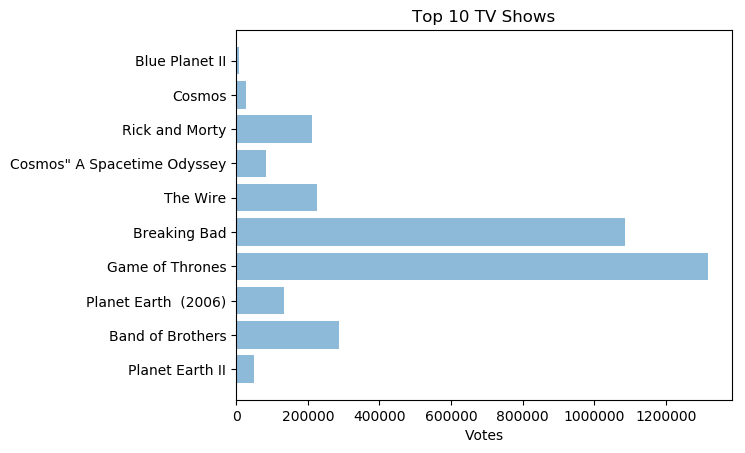

In [2]:
# Plot the top 10 tv shows votes
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Planet Earth II', 'Band of Brothers', 'Planet Earth  (2006)', 'Game of Thrones', 'Breaking Bad', 
          "The Wire", 'Cosmos" A Spacetime Odyssey', 'Rick and Morty', 'Cosmos', 'Blue Planet II')
y_pos = np.arange(len(movies))
votes = [51153,287185,134202,1318379,1085589,225602,84308,210888,27833,7817] 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Votes')
plt.title('Top 10 TV Shows')
 
plt.show()

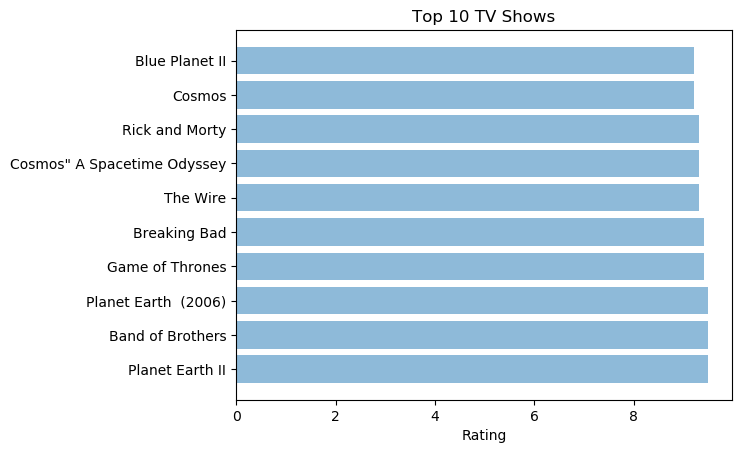

In [3]:
# Plot the top 10 tv shows rating
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Planet Earth II', 'Band of Brothers', 'Planet Earth  (2006)', 'Game of Thrones', 'Breaking Bad', 
          "The Wire", 'Cosmos" A Spacetime Odyssey', 'Rick and Morty', 'Cosmos', 'Blue Planet II')
y_pos = np.arange(len(movies))
rating = [9.5,9.5,9.5,9.4,9.4,9.3,9.3,9.3,9.2,9.2]
 
plt.barh(y_pos, rating, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Rating')
plt.title('Top 10 TV Shows')
 
plt.show()

In [4]:
# Top 10 TV shows votes
sum(votes)

3432956

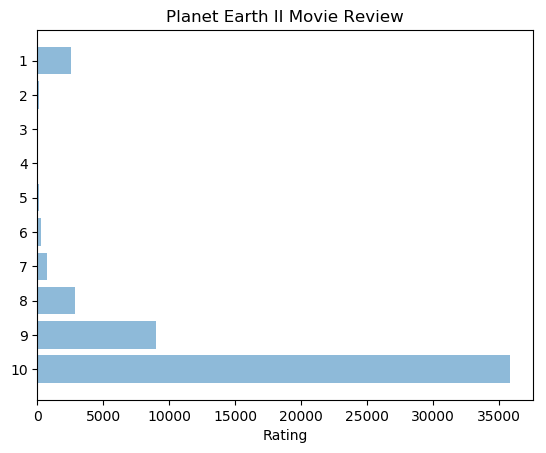

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (35807, 9002, 2836, 749, 253, 159, 82, 74, 108, 2574)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Planet Earth II Movie Review')
 
plt.show()

In [6]:
# Number of Votes of Planet Earth II
sum(votes) 

51644

In [7]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt5491994/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))


Title:  >10


Review: As Planet Earth I was released about ten years ago, a visual improvement could have been expected due to the use of advanced technology, but man, did they up their game. The camera-work and the use of music were both truly superb, as well as the editing in which different sub- segments were all synced so well with the narrating of it by David Attenborough. It was nothing like a nature documentary, it was way beyond that. The short and different segments, were movies on itself. It contained all the different genres, from experiencing the thrill in a Hollywood-like impossible action-escape scenario to having a comical and truly euphoric moment of realization about the true extent of what nature has to offer. And this was all brought so incredibly well.If we had any more of such heavenly quality programs on TV, I would simply just glue my eyes to my TV and live out the rest of my life as a vegetable.


Title:  At once awe-inspiring and terrifying!


Review: I have ju

In [8]:
!pip install wordcloud

In [9]:
import sys

for item in sys.path:
    print(item)


C:\Users\USER\.jupyter\Anaconda\python36.zip
C:\Users\USER\.jupyter\Anaconda\DLLs
C:\Users\USER\.jupyter\Anaconda\lib
C:\Users\USER\.jupyter\Anaconda
C:\Users\USER\AppData\Roaming\Python\Python36\site-packages
C:\Users\USER\.jupyter\Anaconda\lib\site-packages
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\Babel-2.5.0-py3.6.egg
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\win32
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\win32\lib
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\Pythonwin
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\IPython\extensions
C:\Users\USER\.ipython


In [10]:
path = "C:\\Users\\User\\Miniconda3\\lib\\site-packages"

sys.path.append(path)

In [11]:
from wordcloud import WordCloud, STOPWORDS

In [12]:
!pip install stop-words

In [13]:
import sys

for item in sys.path:
    print(item)


C:\Users\USER\.jupyter\Anaconda\python36.zip
C:\Users\USER\.jupyter\Anaconda\DLLs
C:\Users\USER\.jupyter\Anaconda\lib
C:\Users\USER\.jupyter\Anaconda
C:\Users\USER\AppData\Roaming\Python\Python36\site-packages
C:\Users\USER\.jupyter\Anaconda\lib\site-packages
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\Babel-2.5.0-py3.6.egg
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\win32
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\win32\lib
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\Pythonwin
C:\Users\USER\.jupyter\Anaconda\lib\site-packages\IPython\extensions
C:\Users\USER\.ipython
C:\Users\User\Miniconda3\lib\site-packages


In [14]:
path = "C:\\Users\\User\\Miniconda3\\lib\\site-packages"

sys.path.append(path)

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Planet Earth 2.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))


planet : 43
earth : 41
documentary : 29
title: : 25
review: : 25
will : 24
one : 24
ii : 21
best : 20
nature : 18
first : 18
watch : 18
attenborough : 15
seen : 14
david : 13
bbc : 13
never : 13
episode : 12
series : 12
people : 12
way : 11
tv : 11
life : 11
watching : 11
every : 11
beautiful : 11
world : 11
 : 11
animals : 10
documentaries : 10
even : 9
much : 9
10 : 8
narration : 8
show : 8
time : 8
good : 8
greatest : 8
new : 8
us : 8
years : 7
islands : 7
film : 7
masterpiece : 7
watched : 7
made : 7
music : 6
truly : 6
may : 6
almost : 6
experience : 6
others : 6
see : 6
hans : 6
far : 6
must : 6
crew : 6
episodes : 6
better : 6
photography : 5
many : 5
put : 5
thing : 5
without : 5
living : 5
wonderful : 5
human : 5
something : 5
hope : 5
beauty : 5
breathtaking : 5
well : 4
different : 4
quality : 4
simply : 4
eyes : 4
original : 4
dont : 4
natural : 4
production : 4
another : 4
mesmerizing : 4
2006 : 4
everything : 4
action : 4
scenes : 4
whether : 4
doubt : 4
2 : 4
wildlife : 

jewel : 1
cameramen : 1
honing : 1
admire : 1
topped : 1
seriesplanet : 1
hoped : 1
visually : 1
expert : 1
ofteni : 1
enjoy : 1
giving : 1
lengths : 1
question : 1
ive : 1
word : 1
composed : 1
suite : 1
genius : 1
gain : 1
deeper : 1
understanding : 1
planets : 1
intricate : 1
inhabit : 1
fall : 1
become : 1
difference : 1
important : 1
succeeded : 1
seriesdocumentary : 1
appreciated : 1
age : 1
sex : 1
religion : 1
perception : 1
yes : 1
point : 1
view : 1
ratings : 1
lie : 1
couple : 1
minutes : 1
available : 1
4kultra : 1
hd : 1
video : 1
format : 1
newest : 1
procedures : 1
capturing : 1
videos : 1
photos : 1
dronefilming : 1
look : 1
present : 1
order : 1
audiences : 1
attention : 1
differs : 1
unique : 1
entirely : 1
presenting : 1
burst : 1
tears : 1
honest : 1
wast : 1
expecting : 1
release : 1
shocked : 1
producing : 1
reach : 1
creating : 1
undoubtedly : 1
person : 1
hour : 1
free : 1
kill : 1
walking : 1
adore : 1
2007 : 1
brother : 1
directoractor : 1
richard : 1
wisely :

In [17]:
wc1 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [18]:
wc1.generate(wordcloud)

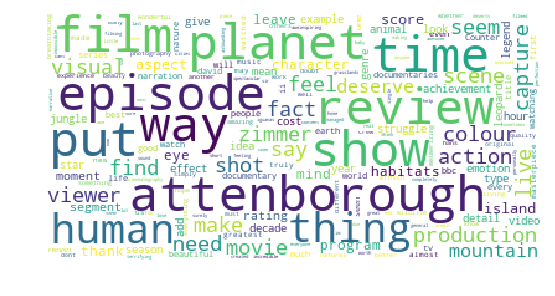

In [19]:
plt.imshow(wc1)
plt.axis("off")
plt.show()

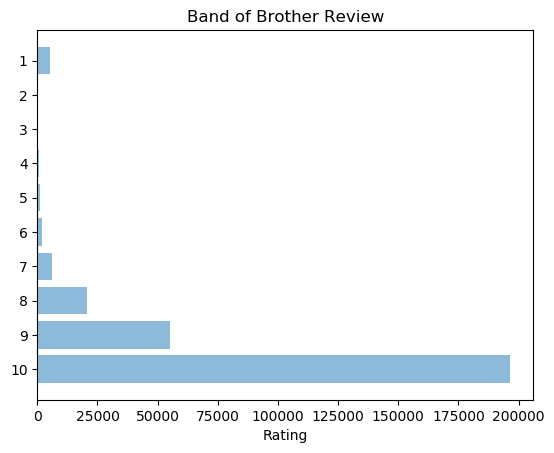

In [110]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (196343, 55056, 20493, 6129, 2114, 1162, 546, 454, 471, 5141)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Band of Brother Review')
 
plt.show()

In [111]:
# Number of Votes of Band of Brothers
sum(votes) 

287909

In [112]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0185906/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))


Title:  Realistic


Review: I am an 80 year old combat veteran (88th Inf. Div. Italy).I watched BOB on the History Channel. I was so overwhelmed, indeed a bit panicked by the authentic nature of 90+% of the uniforms, signs, noises (I take exception to the sound of incoming artillery).I cried several times at the authentic staging - for them and me.I cannot believe I'll watch it again. It's too much. Too real.We never had so much water allowed in a shower.Rate: 10/10


Title:  One of the best war movies/series ever


Review: I have read virtually all of Ambrose's WWII books, and this mini-series faithfully follows one of his best. The experience of these men of the 506th Parachute Infantry Regiment, 101st Airborne, was mirrored throughout the many divisions of Army and Marine ground troops in WWII. I feel that this series represents that collective experience in the finest, most forthright manner possible and pays tribute to them all. The acting, mostly by previously unheralded actors, 

In [113]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Band of Brothers.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

 : 57
war : 56
series : 44
one : 34
episode : 34
really : 28
brothers : 27
title: : 24
review: : 24
band : 22
company : 22
easy : 20
best : 19
show : 19
even : 18
great : 18
men : 17
shows : 16
time : 15
story : 15
soldiers : 15
will : 15
characters : 14
us : 14
much : 13
first : 13
well : 13
see : 13
way : 13
american : 13
world : 13
miniseries : 12
real : 12
made : 12
private : 12
ryan : 12
battle : 12
history : 11
many : 11
saving : 11
think : 11
amazing : 11
good : 11
people : 11
tv : 11
realistic : 10
wwii : 10
feel : 10
actors : 10
hanks : 10
combat : 9
lewis : 9
others : 9
interviews : 9
character : 9
special : 9
know : 9
cast : 9
episodes : 9
things : 9
film : 9
training : 9
production : 9
americans : 9
bob : 8
watch : 8
though : 8
fact : 8
movies : 8
masterpiece : 8
second : 8
every : 8
steven : 8
spielberg : 8
another : 8
normandy : 8
look : 8
german : 8
death : 8
make : 8
bit : 7
never : 7
throughout : 7
now : 7
thing : 7
dont : 7
dvd : 7
movie : 7
done : 7
tom : 7
didnt : 7

bursting : 1
flames : 1
whoever : 1
snippets : 1
tone : 1
choice : 1
havent : 1
owe : 1
informative : 1
hopefully : 1
released : 1
sometime : 1
note : 1
footage : 1
photos : 1
actuall : 1
hope : 1
warts : 1
included : 1
word : 1
awesome : 1
wait : 1
coexecutive : 1
insight : 1
landing : 1
ordeals : 1
ordinary : 1
thrust : 1
convincing : 1
breath : 1
afraid : 1
affects : 1
seemingly : 1
sane : 1
rational : 1
example : 1
nominal : 1
hero : 1
shoots : 1
unarmed : 1
frustration : 1
prisoners : 1
given : 1
cigarettes : 1
surrender : 1
instances : 1
murder : 1
largely : 1
unknown : 1
victory : 1
kind : 1
rises : 1
ranks : 1
friend : 1
grimes : 1
malarkey : 1
grizzled : 1
ex : 1
boys : 1
block : 1
corporal : 1
ww : 1
iiit : 1
companya : 1
warthe : 1
couple : 1
drill : 1
menthe : 1
drillsergeant : 1
davidross : 1
friendsschwimmernot : 1
jacketthen : 1
gets : 1
dropped : 1
movesthe : 1
companyor : 1
itrelaxing : 1
lake : 1
dreadful : 1
period : 1
realisticly : 1
actingalthough : 1
itmaybe : 1
h

uncounted : 1
integrate : 1
beneficiaries : 1
expense : 1
absolute : 1
barest : 1
lived : 1
unimaginable : 1
preserved : 1
free : 1
humility : 1
sheds : 1
narcissism : 1
bring : 1
facetoface : 1
dramatizedyetreal : 1
hundreds : 1
invade : 1
stem : 1
germanys : 1
machine : 1
compels : 1
unmatched : 1
glorified : 1
geniuses : 1
hardened : 1
average : 1
fearless : 1
fearful : 1
imperfect : 1
lucky : 1
unlucky : 1
thrown : 1
incomprehensible : 1
established : 1
foundation : 1
generations : 1
built : 1
unspeakable : 1
exacted : 1
race : 1
exposedband : 1
fainthearted : 1
unapologetically : 1
frank : 1
depiction : 1
bringing : 1
home : 1
vivid : 1
simplicity : 1
brutality : 1
nearabandonment : 1
forests : 1
siege : 1
mandatory : 1
hearts : 1
minds : 1
event : 1
measure : 1
tyranny : 1
interwoven : 1
extraordinary : 1
diminish : 1
sheer : 1
demonstration : 1
20thcentury : 1
turning : 1
pointto : 1
appreciate : 1
inherently : 1
deficient : 1
benefactors : 1
misseddavid : 1
spoilers : 1
aheadwh

In [114]:
wc2 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [115]:
wc2.generate(wordcloud)

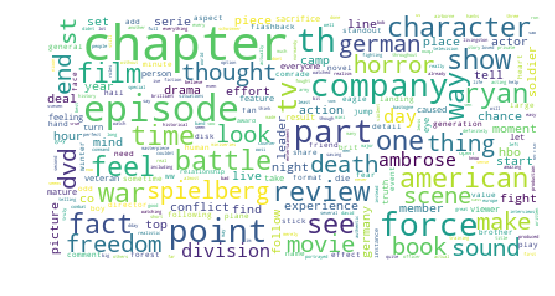

In [116]:
plt.imshow(wc2)
plt.axis("off")
plt.show()

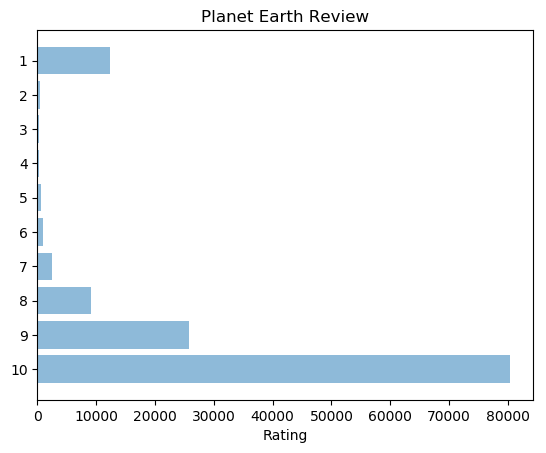

In [90]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (80323, 25722, 9121, 2550, 1000, 658, 308, 340, 424, 12298)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Planet Earth Review')
 
plt.show()

In [91]:
# Number of Votes of Planet Earth 
sum(votes)

132744

In [92]:
#Planet Earth Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0795176/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  11 out of 10


Review: I don't think I can add anything to the previous 10 out of 10 comments, other than that I'd give it a full 11 out of 10 if this were possible. I have seen my share of nature documentaries, but this takes the cake. Utterly awe-inspiring, mesmerizing and brilliant. I own an extensive DVD-collection, but if I had to choose 1 title and had to throw away everything else I had, this would be the one I'd keep. I have no better DVD-title in my collection. Period.David Attenborough is my personal hero. Although he merely provides the commentary for this series (as he did with the also terrific Blue Planet), but his work for the BBC's Natural History division (setting it up and making several brilliant series himself) and his inspiring personality make him one of the true greats.Miss this at your peril.


Title:  A masterpiece of a documentary


Review: The camera work is truly breathtaking. Such amazing wonders captured on film, areas of the planet unspoiled by hu

In [93]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Planet Earth.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

series : 63
planet : 37
nature : 36
 : 29
title: : 24
review: : 24
animals : 24
one : 21
documentary : 21
earth : 17
people : 16
attenborough : 15
many : 15
think : 14
life : 14
see : 14
david : 14
footage : 14
film : 13
world : 13
will : 12
seen : 11
simply : 11
never : 11
humans : 11
10 : 10
amazing : 10
watch : 10
enough : 10
bbc : 10
much : 10
show : 10
made : 10
documentaries : 9
impressive : 9
best : 9
episode : 9
images : 9
dont : 8
work : 8
natural : 8
making : 8
truly : 8
human : 8
things : 8
incredible : 8
beauty : 8
shows : 8
beautiful : 8
programme : 8
really : 8
years : 8
animal : 8
make : 7
camera : 7
shots : 7
makes : 7
even : 7
put : 7
something : 7
everyone : 7
look : 7
time : 7
way : 7
without : 7
1 : 6
breathtaking : 6
reviews : 6
given : 6
wild : 6
recommend : 6
great : 6
million : 6
actually : 6
im : 6
killing : 6
climate : 6
change : 6
anything : 5
full : 5
episodes : 5
television : 5
looking : 5
photography : 5
view : 5
tv : 5
views : 5
creatures : 5
polar : 5
vi

corporations : 1
dependent : 1
fuel : 1
profits : 1
controlled : 1
supplies : 1
immediate : 1
facing : 1
vast : 1
majority : 1
superrichmany : 1
maintain : 1
designation : 1
resourcehave : 1
somehow : 1
convinced : 1
grandchildren : 1
impervious : 1
anythingincluding : 1
natures : 1
wraththanksand : 1
admiration : 1
measured : 1
plenty : 1
gist : 1
pence : 1
scenery : 1
accompanied : 1
type : 1
satisfying : 1
likelihood : 1
measure : 1
genre : 1
yes : 1
goodas : 1
condition : 1
dissenters : 1
helps : 1
drive : 1
healthy : 1
debate : 1
reading : 1
posts : 1
website : 1
appearing : 1
intellectual : 1
andor : 1
nonconformative : 1
pedancy : 1
assuming : 1
misses : 1
objectives : 1
trying : 1
personally : 1
allround : 1
madesome : 1
posted : 1
that;the : 1
exposes : 1
etcwell : 1
reproduction : 1
cohabitation : 1
equally : 1
bit : 1
squeamish : 1
witness : 1
comfort : 1
homes : 1
reviewer : 1
forward : 1
ridiculously : 1
weak : 1
analogy : 1
supposedly : 1
overdoing : 1
aspect : 1
wed : 1


In [95]:
wc3 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [96]:
wc3.generate(wordcloud)

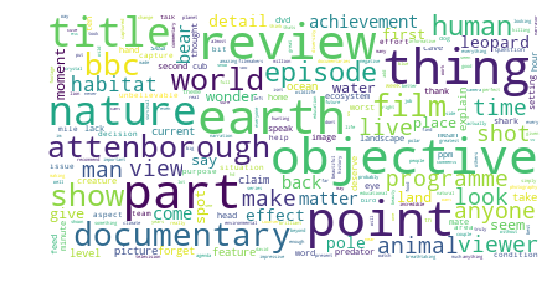

In [97]:
plt.imshow(wc3)
plt.axis("off")
plt.show()

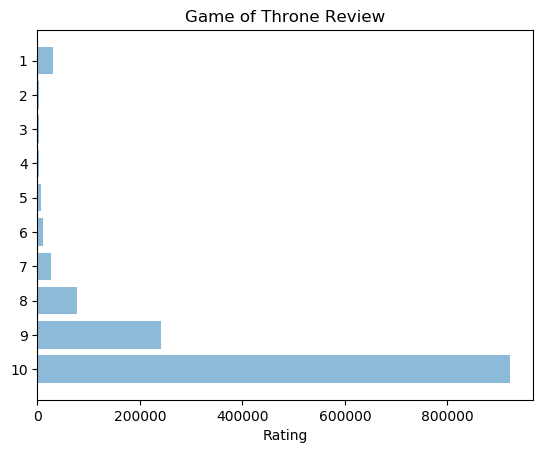

In [98]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (921394, 240386, 77619, 25865, 10200, 6509, 3644, 3339, 3068, 29560)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Game of Throne Review')
 
plt.show()

In [99]:
# Number of Votes of Game of Throne
sum(votes)

1321584

In [100]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0944947/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Finally, a Show that stays true to it's written roots


Review: As an avid reader, I am often disappointed by what is represented by the silver screen. I initially get excited to see one of my favorite series on the big screen, and eventually walk away disgusted. For whatever reason, most shows and movies that are based on epic book series absolutely butcher the original content. So when I saw the preview for "Game of Thrones" on HBO, I was immediately skeptical. Oh, I was going to watch it, but I didn't have high expectations. I did hold a little hope because HBO is known for their high quality shows. I was absolutely shocked to watch the Pilot and realize that it followed the book almost to perfection. The language that is used by the actors is very similar to the way that it was written in the book, and events were not skipped. It stayed very true to the story without adding to it or removing from it. The acting is superb and I actually felt like I was looking into Winterfel

In [101]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Game of Throne.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

show : 61
series : 45
will : 40
story : 39
one : 37
books : 33
characters : 32
book : 30
title: : 25
review: : 25
game : 23
good : 23
episode : 23
well : 23
 : 23
read : 22
really : 20
tv : 20
thrones : 19
fantasy : 19
great : 19
world : 19
hbo : 18
first : 18
never : 18
see : 17
dont : 16
watch : 15
hope : 15
watching : 15
season : 15
time : 14
done : 14
love : 14
stark : 14
scenes : 13
yes : 13
lot : 13
got : 12
every : 12
now : 12
keep : 12
people : 12
much : 12
family : 12
little : 11
actors : 11
acting : 11
many : 11
plot : 11
even : 11
everyone : 11
way : 10
think : 10
better : 10
eddard : 10
sex : 10
character : 10
give : 10
death : 10
shows : 9
actually : 9
come : 9
watched : 9
adaptation : 9
say : 9
least : 9
seems : 9
amazing : 9
written : 8
epic : 8
may : 8
know : 8
real : 8
excellent : 8
believe : 8
lord : 8
made : 8
scene : 8
find : 8
martins : 8
need : 8
seasons : 8
true : 7
screen : 7
absolutely : 7
going : 7
feel : 7
though : 7
episodes : 7
hate : 7
makes : 7
look : 7
r

questionable : 1
motivations : 1
virtually : 1
onedimensional : 1
maybe : 1
joffreythere : 1
couple : 1
league : 1
joy : 1
watch: : 1
addictive : 1
stars : 1
10lesserknown : 1
masterpieces: : 1
http:wwwimdbcomlistls070242495favorite : 1
films: : 1
http:wwwimdbcomlistmkjokvqlsbsfavorite : 1
lowbudget : 1
bmovies: : 1
http:wwwimdbcomlistls054808375favorite : 1
reviewed: : 1
http:wwwimdbcomlistls075552387 : 1
raw : 1
exhilarating : 1
iti : 1
restaurant : 1
steak : 1
complain : 1
getting : 1
meatthey : 1
epically : 1
depict : 1
waywith : 1
exceptions : 1
thrilled : 1
afraid : 1
excitement : 1
fulfill : 1
born : 1
biggest : 1
surprise : 1
figure : 1
emilia : 1
clarke : 1
actress : 1
plays : 1
described : 1
revolves : 1
three : 1
sons : 1
daughters : 1
ruling : 1
kingdomsthe : 1
united : 1
peace : 1
comfort : 1
kings : 1
court : 1
treason : 1
aware : 1
seas : 1
remnants : 1
royal : 1
gather : 1
forces : 1
reclaim : 1
unthinkable : 1
gathers : 1
creatures : 1
myth : 1
forgotten : 1
bias : 1
f

In [102]:
wc4 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [103]:
wc4.generate(wordcloud)

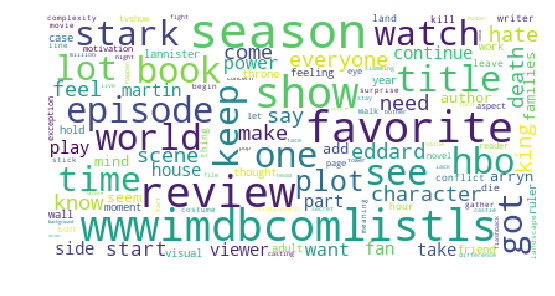

In [104]:
plt.imshow(wc4)
plt.axis("off")
plt.show()

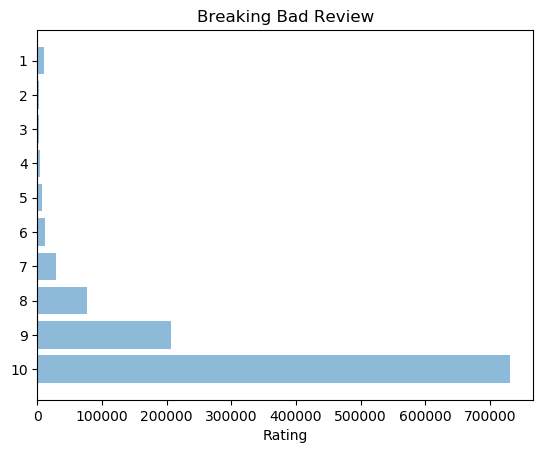

In [117]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (730521, 206183, 76914, 28793, 11304, 6476, 3350, 2624, 2369, 10465)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Breaking Bad Review')
 
plt.show()

In [118]:
# Number of Votes of Breaking Bad
sum(votes)

1078999

In [119]:
#Breaking Bad Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0903747/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  If you mix Scarface, Robin Hood and maybe Tyler Durden with enough meth - you'll get a mean cocktail called 'Heisenberg'


Review: If you are among the few who haven't seen it yet: believe the hype, it really is THAT good. Breaking Bad may not depict reality the way 'Generation Kill' or 'The Wire' did - but then it's not about that, either. From an artistic point of view - performances, writing, direction, camera, music - this show is every bit as good as the other two mentioned above, but unlike those, 'Breaking Bad' just wants to entertain and therefore enjoys a lot more creative freedom.The show plays like the daydream fantasy of any underachieving, struggling middle class family man who's had to bury all his dreams (I mean: who wouldn't want to be a meth-kingpin for a little while?), before it turns into a nightmare. One could almost say that 'Heisenberg' is Walter White's 'Tyler Durden'(for those who don't get the reference: watch 'Fight Club' - you won't regret it).For pu

In [120]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Breaking Bad.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

show : 69
bad : 39
breaking : 36
series : 31
title: : 25
 : 25
review: : 25
one : 25
will : 25
every : 22
best : 21
cranston : 19
good : 18
character : 18
episode : 18
walter : 15
bryan : 15
first : 15
season : 15
know : 15
characters : 14
great : 14
tv : 14
see : 13
story : 13
watch : 12
time : 12
make : 12
way : 11
dont : 11
ive : 11
white : 11
television : 11
meth : 10
seen : 10
writing : 10
family : 10
say : 10
us : 10
teacher : 10
everyone : 10
place : 9
well : 9
many : 9
watching : 8
right : 8
acting : 8
even : 8
drug : 8
chemistry : 8
end : 8
go : 8
really : 7
lot : 7
another : 7
now : 7
think : 7
going : 7
long : 7
amc : 7
im : 7
find : 7
high : 7
school : 7
shows : 7
episodes : 7
seasons : 7
either : 6
middle : 6
almost : 6
brilliant : 6
work : 6
new : 6
cancer : 6
dark : 6
love : 6
part : 6
gilligan : 6
performance : 6
last : 6
aaron : 6
paul : 6
walt : 6
scene : 6
second : 6
black : 5
malcolm : 5
yet : 5
kind : 5
nothing : 5
pilot : 5
much : 5
cranstons : 5
wife : 5
piece : 

guaranteed : 1
wince : 1
loud : 1
deadon : 1
nervous : 1
breakdown : 1
edgea : 1
caveat : 1
wouldbe : 1
ironic : 1
that: : 1
applied : 1
hamfisted : 1
method : 1
check : 1
premiere : 1
whenever : 1
rerun : 1
hustle : 1
itunes : 1
download : 1
impressive : 1
establishing : 1
broadcast : 1
version : 1
material : 1
essential : 1
viewing : 1
allowed : 1
mindand : 1
marveling : 1
magnificent : 1
study : 1
sketched : 1
bother : 1
preparing : 1
speech : 1
emmys : 1
doesthanks : 1
opinion : 1
fewer : 1
seldom : 1
agree : 1
possibly : 1
miscast : 1
run : 1
suspension : 1
disbelief : 1
absolute : 1
requirement : 1
plausible : 1
anyone : 1
succeed : 1
alone : 1
tight : 1
seamless : 1
sympathetic : 1
nearly : 1
resonate : 1
differences : 1
plausibility : 1
admittedly : 1
liberties : 1
serials : 1
arc : 1
skip : 1
proverbial : 1
taking : 1
low : 1
points : 1
minute : 1
original : 1
daring : 1
9944% : 1
brilliance : 1
listing : 1
captioning : 1
notch : 1
betsy : 1
brandt : 1
marie : 1
junior : 1
ann

In [121]:
wc5 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [122]:
wc5.generate(wordcloud)

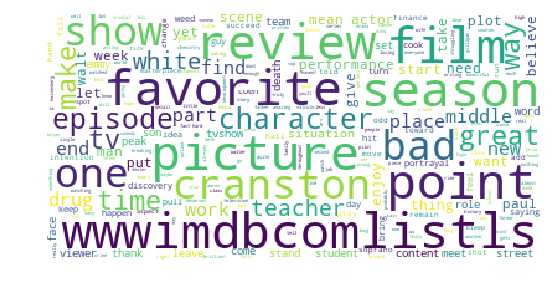

In [123]:
plt.imshow(wc5)
plt.axis("off")
plt.show()

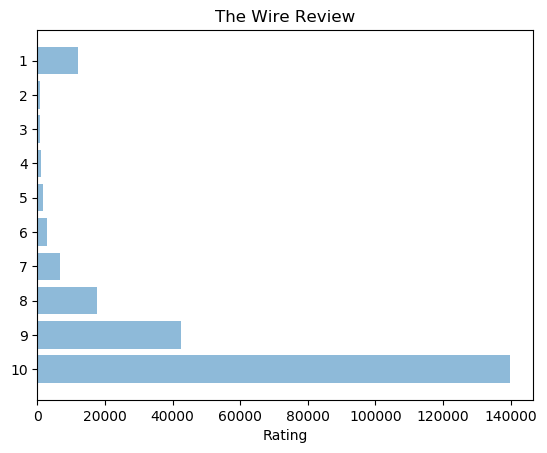

In [124]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (139714, 42604, 17546, 6644, 2961, 1805, 992, 916, 909, 12006)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('The Wire Review')
 
plt.show()

In [125]:
# Number of Vote of The Wire 
sum(votes)

226097

In [ ]:
Title: The Wire Review

In [126]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0306414/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Fantastic


Review: I don't subscribe to HBO. A couple of weeks ago I heard an interview with a young actor from this series on NPR. It was described as a "gritty crime drama" with many Baltimore locals portraying variations on themselves. The interview made it sound interesting enough that I decided to check out the first season on DVD.After the first few episodes I became seriously hooked and devoted 36 hours of the next ten days to the show.Having now watched the first 3 seasons, I believe it to be the best television series I have seen.I do not understand why this show hasn't generated the buzz or the awards of HBO's other series, such as the Sopranos or Deadwood. It is more gripping, faster paced, and more intelligent. The other shows can be a bit plodding, with plot lines that go nowhere, and a few characters I don't much care about. That wasn't the case here.The show is a cross between the Sopranos and the old NBC show Homicide: Life on the Street. The crime/sopranos sid

In [129]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('The Wire.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

show : 79
wire : 54
tv : 36
characters : 35
series : 31
will : 30
title: : 25
review: : 25
one : 25
best : 20
baltimore : 19
time : 19
drug : 19
season : 18
shows : 18
watch : 18
crime : 17
television : 17
city : 17
never : 17
way : 16
people : 16
real : 16
life : 15
lot : 15
story : 15
much : 14
police : 14
 : 14
good : 14
watched : 12
watching : 12
every : 12
something : 12
see : 12
great : 12
seen : 12
even : 12
dont : 11
writing : 11
now : 10
seasons : 10
sopranos : 10
go : 10
cops : 10
thing : 10
drama : 9
many : 9
first : 9
episodes : 9
greatest : 9
society : 9
two : 9
bad : 9
plot : 8
realistic : 8
say : 8
years : 8
make : 8
us : 8
youll : 8
feel : 8
really : 8
another : 8
drugs : 8
cant : 8
made : 7
interesting : 7
side : 7
american : 7
think : 7
find : 7
david : 7
know : 7
things : 7
well : 7
acting : 7
played : 7
entire : 7
involved : 7
lines : 6
makes : 6
better : 6
complex : 6
human : 6
aspect : 6
episode : 6
may : 6
become : 6
simon : 6
simply : 6
isnt : 6
system : 6
law :

cases : 1
closed : 1
thugs : 1
superficial : 1
caricature : 1
csi : 1
suchthe : 1
keeps : 1
photography : 1
oustanding : 1
kind : 1
covered : 1
emmies : 1
glad : 1
adjective : 1
showered : 1
praise : 1
collectively : 1
journalism : 1
element : 1
alive : 1
collective : 1
conscience : 1
waiting : 1
maybe : 1
oneself : 1
wishes : 1
actthere : 1
crowd : 1
prime : 1
humane : 1
greed : 1
antiincumbency : 1
personal : 1
bringing : 1
standstill : 1
poverty : 1
disparity : 1
despair : 1
anguish : 1
willed : 1
amidst : 1
desolate : 1
governance : 1
aspirations : 1
ethics : 1
rabbit : 1
hole : 1
throughwire : 1
sheds : 1
light : 1
widespread : 1
entitled : 1
disenfranchised : 1
usually : 1
viewed : 1
thieves : 1
subtle : 1
passive : 1
racism : 1
seeped : 1
victim : 1
unfortunately : 1
equally : 1
objective : 1
heck : 1
showcases : 1
actually : 1
beings : 1
similar : 1
race : 1
samethe : 1
describe : 1
tells : 1
leaves : 1
observation : 1
acute : 1
objectiveness : 1
microscopic : 1
viewing : 1
sho

In [130]:
wc6 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [131]:
wc6.generate(wordcloud)

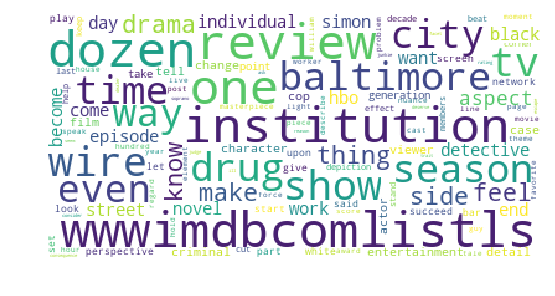

In [132]:
plt.imshow(wc6)
plt.axis("off")
plt.show()

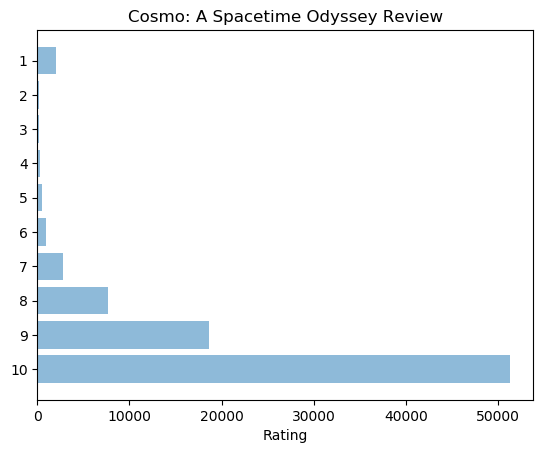

In [133]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (51297, 18692, 7647, 2801, 967, 518, 273, 226, 217, 1981)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Cosmo: A Spacetime Odyssey Review')
 
plt.show()

In [134]:
# Number of Votes of Cosmo: A Space Odyssey
sum(votes)

84619

In [135]:
#The Cosmos: A Spacetime Odyssey Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt2395695/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  My First review


Review: i have been watching and loving films and TV shows for years now, and loving the study of the universe for even longer than that.that being said, this is the first time i have ever felt the need to create an account on IMDb solely to rate something a "10"this has an absolutely stunning, heartfelt, emotional introduction, and i only anticipate it getting better from here.i will probably update this review as the series goes on, or i may just review episodes individually. but either way, i firmly suggest that every human being on earth watch this show.have a good life everyone.


Title:  For a program that makes us feel so small, Cosmos has a lot of heart


Review: Neil deGrasse Tyson's remake of Carl Sagan's original docu-series "Cosmos: A Personal Voyage". Carl Sagan allowed the public to see the wonders of science in an entertaining, thought-provoking and immensely educational way, and Tyson manages to capture the spirit and integrity of the original 

In [136]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Cosmos_A Spacetime Odyssey.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

cosmos : 38
science : 33
tyson : 30
series : 28
neil : 28
title: : 24
review: : 24
sagan : 24
carl : 21
original : 21
show : 21
degrasse : 20
universe : 18
 : 18
first : 13
watch : 13
episodes : 12
one : 12
something : 11
makes : 11
time : 10
program : 10
episode : 10
really : 10
much : 10
new : 10
amazing : 10
shows : 9
years : 9
now : 9
will : 9
way : 9
us : 9
many : 9
documentary : 9
knowledge : 9
scientific : 9
tv : 8
life : 8
everyone : 8
tysons : 8
well : 8
say : 8
even : 7
may : 7
sagans : 7
cosmos: : 7
odyssey : 7
story : 7
never : 7
television : 7
seth : 7
great : 7
think : 7
love : 7
made : 7
school : 7
people : 7
dr : 7
absolutely : 6
facts : 6
1980 : 6
audience : 6
still : 6
animation : 6
learning : 6
cant : 6
hes : 6
young : 6
host : 6
review : 5
good : 5
educational : 5
already : 5
attention : 5
visuals : 5
hope : 5
world : 5
scientists : 5
especially : 5
macfarlane : 5
understand : 5
questions : 5
excited : 5
make : 5
making : 5
ago : 5
kids : 5
lets : 5
ive : 5
season :

add : 1
statistics : 1
theyve : 1
throughout : 1
littleknown : 1
deserve : 1
shoutouts : 1
discoveries : 1
achievementsfurthermore : 1
phenomenal : 1
seem : 1
ultra : 1
examples : 1
uses : 1
scale : 1
explain : 1
scalei : 1
epic : 1
tvdocumentary : 1
talking : 1
upgrade : 1
communicators : 1
world; : 1
tysoneverything : 1
hd : 1
tanks : 1
plus : 1
deep : 1
mysterious : 1
voice : 1
experienceplus : 1
behind : 1
anyones : 1
talk : 1
examplethis : 1
mystical : 1
keeps : 1
e : 1
wondering : 1
day : 1
episodei : 1
piece : 1
cinematography : 1
saw : 1
lessons : 1
fused : 1
created : 1
lurker : 1
decided : 1
register : 1
site : 1
insatiable : 1
appetite : 1
anthropology : 1
begin : 1
describe : 1
delight : 1
jaw : 1
hit : 1
floor : 1
realized : 1
balanced : 1
companys : 1
strong : 1
pulls : 1
eloquent : 1
astrophysical : 1
origins : 1
development : 1
leaps : 1
achieved : 1
often : 1
overlooked : 1
contributors : 1
disenfranchised : 1
tenacious : 1
females : 1
refused : 1
fold : 1
patriarchal 

In [137]:
wc7 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [138]:
wc7.generate(wordcloud)

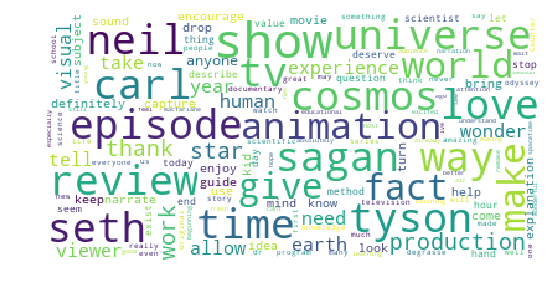

In [139]:
plt.imshow(wc7)
plt.axis("off")
plt.show()

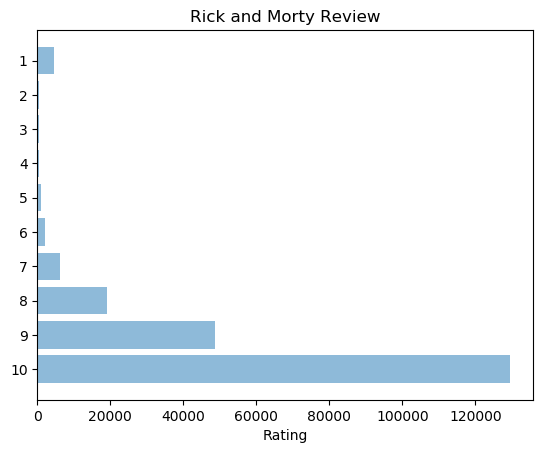

In [140]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (129400, 48744, 19125, 6076, 1985, 1065, 577, 544, 570, 4537)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Rick and Morty Review')
 
plt.show()

In [141]:
# Number of Votes of Rick and Morty 
sum(votes)

212623

In [142]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt2861424/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Easily the best show I've seen in a while


Review: This show is honestly great. It is easily the best animation show I have seen in a while on any network. The second the show starts you can tell that the characters fit perfectly with each other, and involved with the craziness that happens in the universe with Rick and Morty, they are immediately hilarious and extremely creative at the same time. A couple episodes in and I could tell that this was a unique show, and that people need to be watching it because it has huge potential. And with Dan Harmon writing and directing at the helm of it all, the magic that this show brings is a rare gem in television that people need to watch.. So yeah I highly suggest this show to anyone who wants a true genuine laugh at least once a week.


Title:  Very solidly constructed television.


Review: This is an extremely solid show. It is *dark*, but there are certainly moments that approach the limits of any sort of television style format.Th

In [143]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Rick and Morty.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

show : 89
episode : 36
rick : 34
morty : 29
title: : 25
review: : 25
really : 23
characters : 18
every : 18
best : 17
even : 17
one : 17
great : 15
time : 15
episodes : 15
will : 14
first : 14
better : 14
ive : 13
new : 13
season : 13
good : 13
funny : 12
watch : 11
shows : 11
series : 11
always : 10
go : 10
jokes : 10
think : 10
dont : 10
animation : 9
hilarious : 9
 : 9
plot : 9
writers : 9
humor : 9
well : 9
family : 9
character : 9
simpsons : 9
way : 9
watching : 8
see : 8
animated : 8
tv : 8
seen : 7
unique : 7
television : 7
many : 7
bit : 7
thing : 7
genius : 7
far : 7
making : 7
cartoons : 7
sometimes : 7
say : 7
watched : 7
cant : 7
love : 7
try : 7
fun : 7
easily : 6
creative : 6
dan : 6
writing : 6
end : 6
plots : 6
actually : 6
thats : 6
especially : 6
going : 6
part : 6
feel : 6
original : 6
adult : 6
around : 6
lot : 6
cartoon : 6
though : 6
dub : 6
people : 5
harmon : 5
theres : 5
feels : 5
know : 5
might : 5
fresh : 5
guy : 5
back : 5
pretty : 5
story : 5
fact : 5
im : 

shines : 1
yet : 1
remotely : 1
clichéd : 1
uninspired : 1
frequent : 1
obvious : 1
sci : 1
fi : 1
filmsshows : 1
present : 1
usually : 1
damn : 1
disturbed : 1
frankly : 1
given : 1
casual : 1
planetary : 1
genocide : 1
occur : 1
episodeon : 1
inclined : 1
directly : 1
address : 1
writer : 1
currently : 1
left : 1
wildly : 1
criticising : 1
saying : 1
existas : 1
fine : 1
opinion : 1
takes : 1
place : 1
fairly : 1
clear : 1
indeed : 1
aliens : 1
alien : 1
planets : 1
alternate : 1
wormholes : 1
rapid : 1
cellular : 1
evolution : 1
mutation : 1
deep : 1
disintegration : 1
talking : 1
dogs : 1
sentient : 1
shrink : 1
growth : 1
giant : 1
naked : 1
santa : 1
claus : 1
orbit : 1
earthi : 1
believing : 1
insisting : 1
nonbiblical : 1
stuff : 1
maintains : 1
illusion : 1
insane : 1
says : 1
goodits : 1
needed : 1
imo : 1
programing : 1
wiseto : 1
90s : 1
subground : 1
dr : 1
critic : 1
home : 1
yes : 1
aesthetic : 1
superwhelms : 1
measurable : 1
date : 1
meets : 1
spontaneity : 1
futurama;

In [144]:
wc8 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [145]:
wc8.generate(wordcloud)

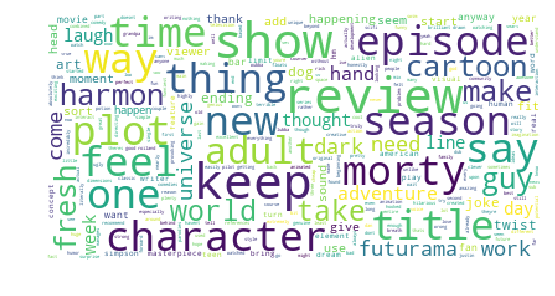

In [146]:
plt.imshow(wc8)
plt.axis("off")
plt.show()

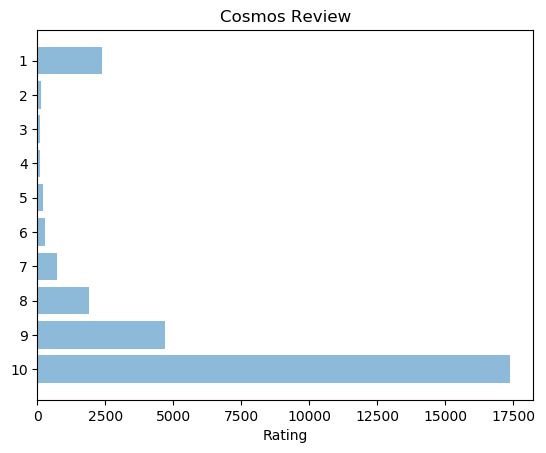

In [147]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (17364, 4705, 1914, 740, 290, 200, 107, 104, 120, 2361)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Cosmos Review')
 
plt.show()

In [148]:
# Number of Cosmos
sum(votes)

27905

In [149]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0081846/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Greatest of All Time


Review: Cosmos is, hands-down, the greatest educational series of all-time. Even the wonderful (and highly recommended) history series Connections can't hold a flame to the perfection of Cosmos. If you don't believe me, look at the user ratings.It makes me tear up that most of my friends and almost all Americans don't know what Cosmos is (or what "cosmos" means), yet they can name every Friends cast member and their character's name and quirks.Computer graphics have come a long way since 1980, and just a few minor scientific updates are needed, but the series was so far ahead of its time that other than the spaceship deck set, the hair, and the clothes, it doesn't seem dated in 2004. It won the Peabody and Emmy awards, and remains to this day the most watched PBS series of all time (600+ million viewers in 60 countries).The series is 13-hours, but ought to count as a three semester hour (~45 hours of class) Intro to Cosmology college course. Sagan's abili

In [150]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Cosmos.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

series : 75
sagan : 68
cosmos : 63
science : 52
carl : 35
one : 31
universe : 27
us : 26
title: : 25
time : 25
review: : 25
life : 24
sagans : 22
history : 17
episode : 17
will : 17
 : 17
every : 16
way : 16
first : 16
years : 15
space : 15
even : 14
world : 13
made : 13
1980 : 12
scientific : 12
earth : 12
well : 12
new : 12
music : 12
makes : 11
make : 11
show : 11
greatest : 10
journey : 10
people : 10
think : 10
watch : 10
still : 10
see : 10
documentary : 10
human : 10
seen : 9
great : 9
around : 9
many : 9
stars : 9
part : 9
personal : 9
though : 9
topics : 9
simple : 8
later : 8
wonder : 8
anyone : 8
may : 8
television : 8
episodes : 8
effects : 8
name : 7
pbs : 7
library : 7
never : 7
best : 7
presented : 7
must : 7
perhaps : 7
13 : 7
astronomy : 7
field : 7
actually : 7
almost : 6
far : 6
doesnt : 6
viewer : 6
thanks : 6
always : 6
knowledge : 6
came : 6
good : 6
dvd : 6
two : 6
planets : 6
used : 6
take : 6
production : 6
small : 6
vangelis : 6
shows : 6
topic : 6
covers : 6


chiens : 1
aboyer : 1
lp : 1
recording : 1
bulgarian : 1
shepherdess : 1
song : 1
advantage : 1
unrepeatable : 1
repeated : 1
outstandingly : 1
brilliantmany : 1
kcet : 1
los : 1
angeles : 1
apparently : 1
disassociated : 1
deciphering : 1
hieroglyphics : 1
egyptians : 1
accompanying : 1
spacecraft : 1
tour : 1
meet : 1
transmits : 1
swoops : 1
spectator : 1
skinsagan : 1
hosts : 1
magnificently : 1
solving : 1
natures : 1
mysteries : 1
encompassed : 1
so: : 1
knot : 1
untie : 1
breathout : 1
prevailing : 1
previously : 1
everyday : 1
researched : 1
astrology : 1
ufo : 1
phenomenon : 1
role : 1
cosmosoverall : 1
engineer : 1
dreams : 1
fascinated : 1
created : 1
experience : 1
beautifully : 1
landscape : 1
way; : 1
genetics : 1
neuroscience : 1
relationships : 1
politics : 1
cultures : 1
goal : 1
masterfully : 1
anticipation : 1
commencement : 1
9 : 1
sciencenatural : 1
focused : 1
follow : 1
novathe : 1
mechanical : 1
80s : 1
pursue : 1
profession : 1
electrical : 1
25 : 1
discovering

statements : 1
warningsthe : 1
edward : 1
real : 1
mathematics; : 1
strand : 1
endeavor : 1
ties : 1
immense : 1
congress : 1
called : 1
cosmosfirst : 1
broadcasting : 1
service : 1
widely : 1
viewed : 1
billion : 1
peoplenot : 1
merely : 1
dry : 1
didactic : 1
appeals : 1
nuanced : 1
syllable : 1
props : 1
reenactments : 1
shooting : 1
turtled : 1
neck : 1
allcosmos : 1
optimistic : 1
cry : 1
humanity; : 1
universe; : 1
plea : 1
rock : 1
drifting : 1
endless : 1
nightit : 1
yes : 1
quaintly : 1
chumblywumbly : 1
hokey : 1
supposedly : 1
methodology : 1
is: : 1
continuallychanging : 1
facility : 1
presenting : 1
gleaned : 1
knowing : 1
precise : 1
measurements : 1
images : 1
monitoring : 1
researching : 1
welcoming : 1
changes : 1
claim : 1
ultimate : 1
beall : 1
endall : 1
rebroadcast : 1
updated : 1
computer : 1
satellite : 1
photos : 1
systems : 1
digital : 1
current : 1
verified : 1
thingseven : 1
helluva : 1
bringing : 1
strands : 1
wrecking : 1
ball : 1
intellectualism : 1
note: 

In [151]:
wc9 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [152]:
wc9.generate(wordcloud)

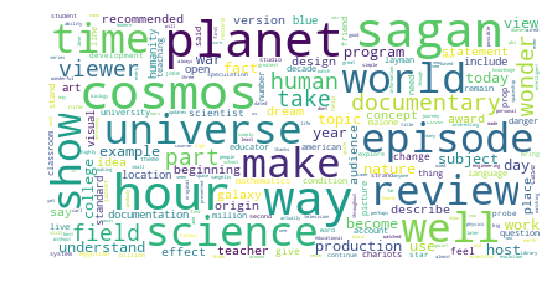

In [153]:
plt.imshow(wc9)
plt.axis("off")
plt.show()

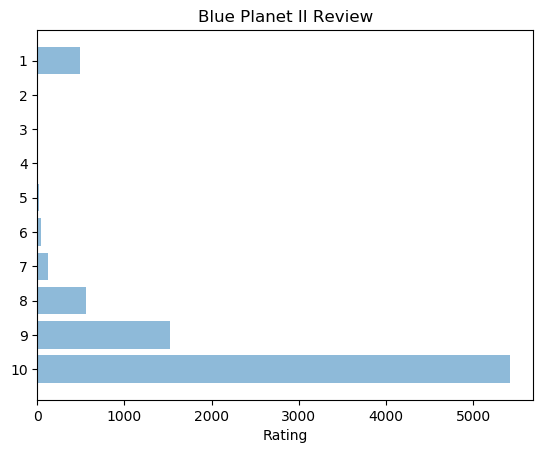

In [154]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (5421, 1523, 562, 126, 40, 16, 11, 11, 12, 494)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Blue Planet II Review')
 
plt.show()

In [155]:
# Number of votes of Blue Planet II
sum(votes)

8216

In [156]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt6769208/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Blue is the new Blue


Review: Much will probably be discussed about the genuinely stunning photography in this series but it cannot be underplayed enough: it is imperious.Beautiful, beautiful shots of wonderful creatures going about their daily lives, together with informative narration and innovation. All rounded off accompanied by a blockbuster-movie-standard score which soars and settles with the visuals.This series took around four years to film, and I can only imagine what the poor editors had to leave out.Worthy of a mention is the astounding super-slow motion on display. In oceans so vast, we can see single droplets! It is a brilliant series for all ages.The BBC is unsurpassed at this type of documentary. And to think, the BBC costs UK taxpayers about 50 pence per day and some people think it should be cut down/split up/privatised. I really hope this doesn't happen as, yes, the BBC has faults like many broadcasters, but when it does something like this, it really cannot

In [157]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Blue Planet 2.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

planet : 32
blue : 31
series : 25
title: : 21
review: : 21
ii : 16
us : 15
one : 15
oceans : 14
documentary : 14
life : 13
much : 11
will : 10
years : 10
bbc : 10
david : 10
animals : 9
photography : 8
see : 8
still : 8
ocean : 8
best : 8
 : 8
nature : 8
make : 8
earth : 8
hope : 7
many : 7
watch : 7
first : 7
every : 7
come : 7
attenborough : 7
time : 7
effects : 7
lot : 7
moments : 7
new : 6
great : 6
episodes : 6
episode : 6
amazing : 6
stunning : 5
beautiful : 5
think : 5
really : 5
awe : 5
deep : 5
change : 5
way : 5
television : 5
dolphins : 5
may : 5
say : 5
vast : 4
yes : 4
stop : 4
go : 4
2 : 4
feel : 4
give : 4
everything : 4
watching : 4
tv : 4
seen : 4
show : 4
part : 4
might : 4
underwater : 4
filming : 4
seas : 4
gift : 4
especially : 4
world : 4
cant : 4
sound : 4
2017 : 4
need : 4
soundtrack : 4
informative : 3
narration : 3
took : 3
around : 3
film : 3
single : 3
brilliant : 3
people : 3
doesnt : 3
something : 3
installment : 3
now : 3
1010 : 3
masterpiece : 3
remindin

In [158]:
wc10 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [159]:
wc10.generate(wordcloud)

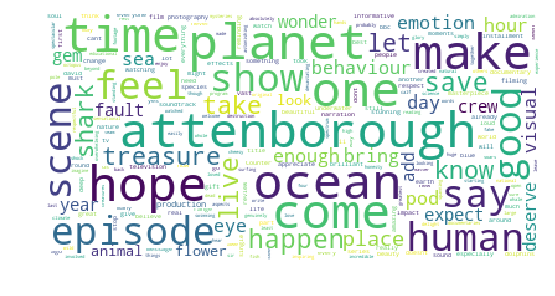

In [160]:
plt.imshow(wc10)
plt.axis("off")
plt.show()

In [161]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=nv]')]



imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)

for item in imdb:
    print(item['place'], '-', 'Title:', item['movie_title'], '('+item['year']+') -', 'Rating:', item['rating'], 'Votes:', item['vote'])

1 - Title: The Shawshank Redemption (1994) - Rating: 9.216809116767225 Votes: 1967783
2 - Title: The Godfather (1972) - Rating: 9.158997640912146 Votes: 1347321
3 - Title: The Godfather: Part II (1974) - Rating: 8.993756334295025 Votes: 932289
4 - Title: The Dark Knight (2008) - Rating: 8.956405373755427 Votes: 1938888
5 - Title: 12 Angry Men (1957) - Rating: 8.910027820736284 Votes: 548424
6 - Title: Schindler's List (1993) - Rating: 8.898655918570588 Votes: 1015029
7 - Title: The Lord of the Rings: The Return of the King (2003) - Rating: 8.868898107219891 Votes: 1403954
8 - Title: Pulp Fiction (1994) - Rating: 8.864623253314601 Votes: 1538159
9 - Title: The Good, the Bad and the Ugly (1966) - Rating: 8.831523249931433 Votes: 584063
1 - Title:  Fight Club (1999) - Rating: 8.783029052901497 Votes: 1576820
11 - Title: The Lord of the Rings: The Fellowship of the Ring (2001) - Rating: 8.768987679244287 Votes: 1421304
12 - Title: Forrest Gump (1994) - Rating: 8.734557839260052 Votes: 1495

213 - Title: Blade Runner 2049 (2017) - Rating: 8.051110239965615 Votes: 308312
214 - Title: The Princess Bride (1987) - Rating: 8.050731376810727 Votes: 339428
215 - Title: Nausicaä of the Valley of the Wind (1984) - Rating: 8.049592455281244 Votes: 119831
216 - Title: Catch Me If You Can (2002) - Rating: 8.045102864584878 Votes: 662120
217 - Title: Harry Potter and the Deathly Hallows: Part 2 (2011) - Rating: 8.042208811101917 Votes: 648363
218 - Title: Rocky (1976) - Rating: 8.038606934569033 Votes: 444934
219 - Title: The Maltese Falcon (1941) - Rating: 8.03714937406935 Votes: 133974
220 - Title: La La Land (2016) - Rating: 8.035849183305347 Votes: 379370
221 - Title: The Grapes of Wrath (1940) - Rating: 8.034024281741221 Votes: 77005
222 - Title: Barry Lyndon (1975) - Rating: 8.032932398609388 Votes: 123653
223 - Title: Monsters, Inc (2001) - Rating: 8.032252739065745 Votes: 693216
224 - Title: The Nights of Cabiria (1957) - Rating: 8.027646157244995 Votes: 36154
225 - Title: Donn

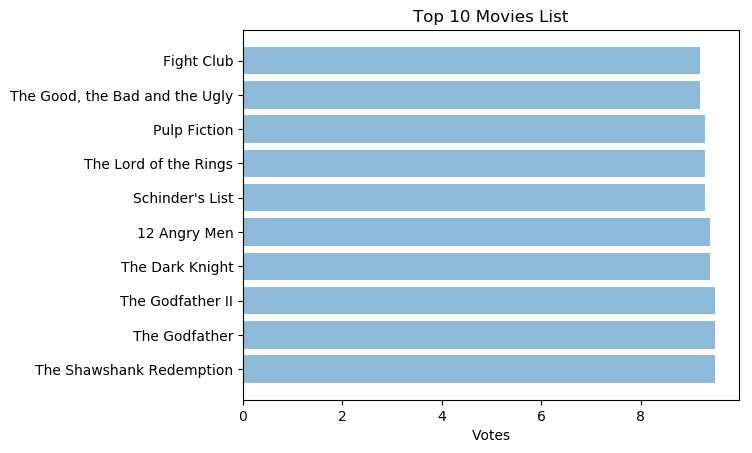

In [162]:
# Plot the Top 10 Movies List
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('The Shawshank Redemption', 'The Godfather', 'The Godfather II', 'The Dark Knight', '12 Angry Men', 
          "Schinder's List", 'The Lord of the Rings', 'Pulp Fiction', 'The Good, the Bad and the Ugly', 'Fight Club')
y_pos = np.arange(len(movies))
votes = (1952196, 1336257, 924345, 1924425, 542788,
         1007034, 1393835, 1526625, 579661, 1564986) 
plt.barh(y_pos, rating, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Votes')
plt.title('Top 10 Movies List')
 
plt.show()

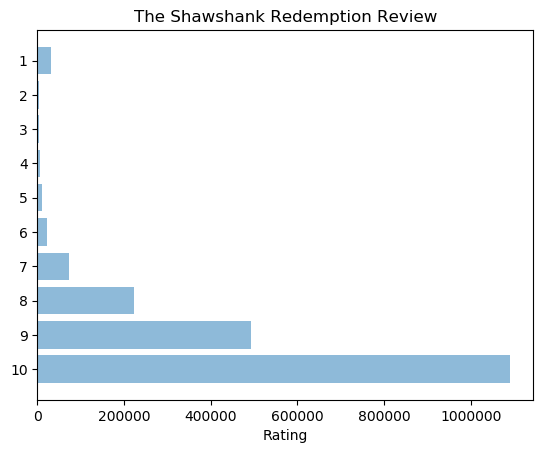

In [165]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (1090216, 492771, 223295, 72501, 21617, 10938, 5181, 4077, 3867, 31757)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('The Shawshank Redemption Review')
 
plt.show()

In [166]:
# Number of Votes of Shawshank Redemption
sum(votes)

1956220

In [167]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0111161/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Tied for the best movie I have ever seen


Review: Why do I want to write the 234th comment on The Shawshank Redemption? I am not sure - almost everything that could be possibly said about it has been said. But like so many other people who wrote comments, I was and am profoundly moved by this simple and eloquent depiction of hope and friendship and redemption. The only other movie I have ever seen that effects me as strongly is To Kill a Mockingbird. Both movies leave me feeling cleaner for having watched them.I didn't intend to see this movie at all: I do not like prison movies and I don't normally watch them. I work at a branch library and one day as I was checking The Shawshank Redemption out to one of our older patrons, she said to me, "Whenever I feel down or depressed, I check out this movie and watch it and it always makes me feel better." At the time, I thought that was very strange. One day there was nothing on TV except things I absolutely would not watch under any c

In [168]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('Shawshank Redemption.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 95
film : 94
shawshank : 79
prison : 59
one : 51
redemption : 49
 : 49
andy : 46
best : 39
story : 34
will : 30
hope : 28
time : 28
red : 28
great : 27
title: : 25
review: : 25
movies : 25
see : 24
life : 24
good : 22
films : 22
robbins : 22
freeman : 22
many : 21
dont : 21
people : 19
going : 19
never : 19
seen : 18
world : 16
morgan : 16
think : 16
say : 16
really : 15
still : 15
made : 14
darabont : 14
tim : 14
years : 14
better : 13
every : 13
dufresne : 13
hollywood : 13
busy : 13
almost : 12
things : 12
king : 12
go : 12
even : 12
us : 12
way : 12
said : 11
feel : 11
makes : 11
stephen : 11
two : 11
character : 11
much : 11
well : 11
characters : 11
man : 11
want : 10
friendship : 10
watch : 10
title : 10
friends : 10
first : 10
yet : 10
simply : 10
performance : 10
another : 10
times : 9
novella : 9
love : 9
doesnt : 9
outside : 9
know : 9
warden : 9
top : 9
comes : 9
though : 9
acting : 9
find : 9
true : 9
greatest : 9
believe : 9
thing : 9
frank : 8
amazing : 8
music :

opportunity : 1
ignores : 1
abundance : 1
exit : 1
settling : 1
weaknesses : 1
strongfirstly : 1
aerial : 1
shots : 1
total : 1
eyeopener : 1
architecture : 1
gothic : 1
design : 1
casts : 1
shadow : 1
stretching : 1
towers : 1
blotting : 1
memories : 1
beaches : 1
zihuatanejo; : 1
heres : 1
picking : 1
glass : 1
o : 1
milk : 1
silver : 1
spoon : 1
ass : 1
fish : 1
crack : 1
losing : 1
resents : 1
quickly : 1
major : 1
strengths : 1
flicks : 1
sidekick : 1
honestly : 1
odd : 1
weighs : 1
hits : 1
notes : 1
itits : 1
deliberate : 1
spend : 1
timeline : 1
spans : 1
pass : 1
reality : 1
amplified : 1
lacks : 1
moments : 1
merely : 1
intends : 1
taking : 1
sweet : 1
pays : 1
tedium : 1
climax : 1
sees : 1
forgottenwith : 1
definite : 1
subtext : 1
quiet : 1
selfless : 1
carefree : 1
obvious : 1
christ : 1
modeled : 1
richard : 1
nixon : 1
close : 1
personified : 1
satan : 1
subtexts : 1
speaks : 1
thisoverall : 1
score: : 1
9810 : 1
= : 1
served : 1
memory : 1
proved : 1
besting : 1
ran : 

bagging : 1
groceries : 1
local : 1
cheat : 1
everythings : 1
alrightthis : 1
mooch : 1
route : 1
mapped : 1
upsetting : 1
rewarding : 1
comparable : 1
diamorphinethe : 1
trouble : 1
mean : 1
fortunate : 1
individuals : 1
throughso : 1
listing : 1
saved : 1
altered : 1
improved : 1
front : 1
anyway : 1
cues : 1
posturing : 1
wandering : 1
lips : 1
lose : 1
finals : 1
highquality : 1
taught : 1
nice : 1
remain : 1
wholeheartedly : 1
sites : 1
wondrously : 1
indelible : 1
hanks : 1
underplay : 1
boredom : 1
cynicism : 1
lifer : 1
confinement : 1
someday : 1
belated : 1
members : 1
appreciate : 1
timebut : 1
falsely : 1
quality : 1
bemused : 1
amused : 1
compared : 1
player : 1
1992 : 1
mystic : 1
river : 1
2003 : 1
actorit : 1
villain : 1
biblequoting : 1
biblethumping : 1
massively : 1
hypocritical : 1
samuel : 1
doozy : 1
fundamentalist : 1
christians : 1
precisely : 1
predatory : 1
homosexual : 1
behavior : 1
hiding : 1
illgotten : 1
contents : 1
duplicitous : 1
accounts : 1
framed : 

In [169]:
wc11 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [170]:
wc11.generate(wordcloud)

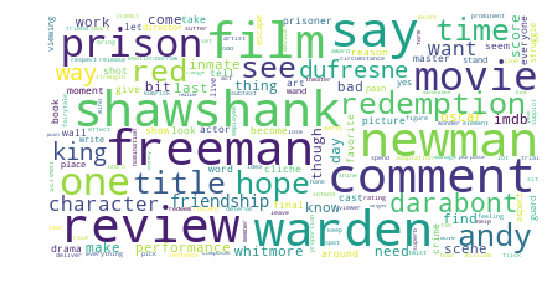

In [171]:
plt.imshow(wc11)
plt.axis("off")
plt.show()

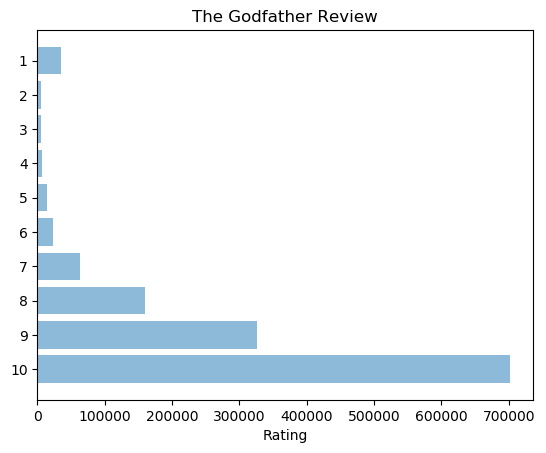

In [172]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (701618, 326171, 159215, 63111, 23579, 13620, 6784, 5376, 5218, 34501)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('The Godfather Review')
 
plt.show()

In [173]:
# Number of Vote of Godfather 
sum(votes)

1339193

In [176]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0068646/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  The Pinnacle Of Flawless Films!


Review: 'The Godfather' is the pinnacle of flawless films! The first time I viewed 'The Godfather' I was in my early teens and it was the most astounding film I had ever seen, and has since then stood as my all-time favourite film. It is due to this that I have been looking forward to writing a review of this unforgettable classic. So let's start from the beginning. The film opens to four words, 'I believe in America', it's crazy to think that this simple line has become a resonant quote solely due to the impact it made on the entrance to the film's "threshold". This is just one of the many renowned quotes that litter the film, and believe me, there are a lot. After the first take we are then absorbed into the life of Vito Corleone, brilliantly portrayed by the Oscar- winning performance of Marlon Brando. Vito is a feared man, he is a criminal, he is a mafioso, but above all he is a respected family man, his three sons are depicted by three exc

In [177]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('God Father.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

film : 128
godfather : 69
movie : 60
one : 58
family : 58
michael : 38
don : 38
corleone : 34
films : 32
much : 31
vito : 29
great : 29
pacino : 27
 : 27
time : 26
brando : 26
many : 25
life : 25
coppola : 25
see : 25
title: : 24
review: : 24
story : 24
never : 24
seen : 22
characters : 22
character : 22
made : 21
al : 21
will : 19
even : 19
good : 19
best : 19
well : 18
make : 18
man : 17
crime : 17
greatest : 17
acting : 17
part : 17
every : 16
mafia : 16
cast : 16
think : 15
business : 15
marlon : 14
really : 14
movies : 14
people : 14
wedding : 14
first : 13
james : 13
scenes : 13
performances : 13
perfect : 13
watching : 13
performance : 12
caan : 12
robert : 12
duvall : 12
son : 12
violence : 12
thats : 12
world : 12
become : 11
something : 11
say : 11
power : 11
love : 11
corleones : 10
memorable : 10
gangster : 10
way : 10
almost : 10
far : 10
always : 10
role : 10
end : 10
quite : 10
fredo : 10
ive : 10
believe : 9
take : 9
actors : 9
head : 9
direction : 9
masterpiece : 9
com

frame : 2
visual : 2
important : 2
likely : 2
expectations : 2
disappointed : 2
directors : 2
sisters : 2
italy : 2
year : 2
gripping : 2
full : 2
conte : 2
sterling : 2
glamorise : 2
coppela : 2
model : 2
awesome : 2
slow : 2
average : 2
soapy : 2
meet : 2
centre : 2
portrayal : 2
daughters : 2
`the : 2
acknowledge : 2
director : 2
pacing : 2
continues : 2
viewed : 1
teens : 1
forward : 1
beginning : 1
america : 1
resonant : 1
quote : 1
solely : 1
entrance : 1
threshold : 1
renowned : 1
litter : 1
absorbed : 1
brilliantly : 1
winning : 1
mafioso : 1
respected : 1
depicted : 1
child : 1
transfer : 1
reluctant : 1
gruesome : 1
industry : 1
certain : 1
epitomises : 1
antiheroes : 1
whilst : 1
villains : 1
audacious : 1
guilt : 1
rife : 1
scores : 1
wellpaced : 1
drama : 1
overall : 1
critical : 1
commercial : 1
successes : 1
flick : 1
overflowing : 1
rich : 1
emotion : 1
blessed : 1
arguably : 1
concentrating : 1
easier : 1
judge : 1
quality : 1
honestly : 1
tenthis : 1
wonder : 1
hadnt 

wordless : 1
sympathy : 1
forced : 1
assume : 1
sovereignty : 1
outdoor : 1
garden : 1
affectionate : 1
express : 1
openlythe : 1
warm : 1
l0 : 1
nominations : 1
flavor : 1
undisputed : 1
patriarch : 1
manner : 1
chin : 1
symbol : 1
kisses : 1
charismatic : 1
reflect : 1
implacabilitypacinos : 1
gentle : 1
cunning : 1
coldblooded : 1
learned : 1
talk : 1
counsel : 1
commandment : 1
sets : 1
listen : 1
cirsitto : 1
pleading : 1
nearrape : 1
beating : 1
suffered : 1
daughterattending : 1
bookmaker : 1
carlo : 1
rizzi : 1
decorated : 1
marine : 1
kate : 1
nonitalian : 1
introduces : 1
characters:sonny : 1
rough : 1
impulsive : 1
up; : 1
shy : 1
righthand : 1
legal : 1
adviser : 1
steady : 1
thinking : 1
controlled; : 1
battered : 1
rebellious : 1
achieves : 1
promotes : 1
horrific : 1
martine : 1
idol : 1
tears : 1
jack : 1
woltz : 1
marley : 1
finds : 1
horrifying : 1
pool : 1
blood; : 1
lenny : 1
montana : 1
giant : 1
thug : 1
trusted : 1
enforcers; : 1
tessio : 1
abbe : 1
vigoda : 1
fe

In [180]:
wc12 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [181]:
wc12.generate(wordcloud)

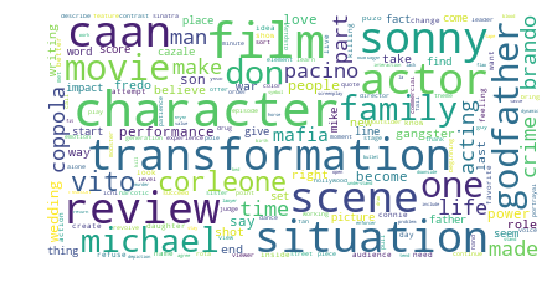

In [182]:
plt.imshow(wc12)
plt.axis("off")
plt.show()

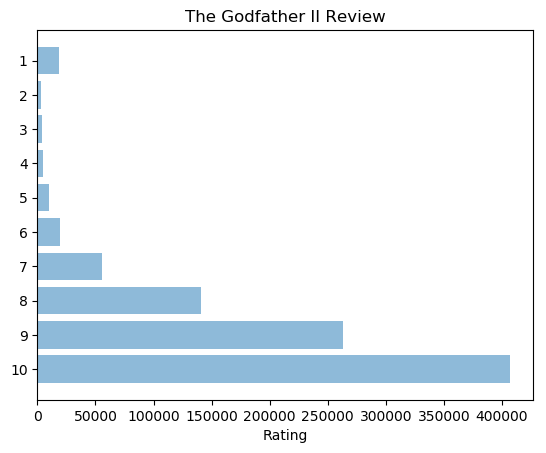

In [183]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (406609, 263146, 140644, 55842, 19581, 10187, 4875, 3756, 3410, 18480)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('The Godfather II Review')
 
plt.show()

In [184]:
# Number of Vote of Godfather II
sum(votes)

926530

In [185]:
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0071562/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Breathtaking in its scope and tragic grandeur...


Review: Coppola's masterpiece is rivaled only by "The Godfather, Part II" in which the 1940s setting of the first movie is extended backwards and forwards to reveal the corrupting effect of power...The film, breathtaking in its scope and tragic grandeur, shows two parallel stories extending two different time periods: the early career of young Vito Corleone seen first around the turn of the 20th century in Sicily, and then in 1917, building his criminal underworld in the Italian ghettos of New York City, post World War I, plus that of his son, Michael (Al Pacino) desperately trying to keep his family together...Al Pacino's performance is quiet and solemn... He is cold and ruthless, with a whole contrast from the idealistic innocent war hero we initially met at the beginning of the first film... Here he's a calculating and frightening force, seeking to expand casinos into Pre-Revolutionary Cuba and consolidating an empire surrou

In [186]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('God Father 2.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

film : 93
michael : 71
first : 68
godfather : 61
corleone : 59
vito : 54
part : 52
one : 37
family : 35
de : 35
movie : 34
ii : 33
niro : 33
sequel : 32
coppola : 31
see : 31
pacino : 29
robert : 29
great : 29
young : 27
even : 26
good : 25
story : 25
review: : 23
two : 23
original : 23
title: : 22
time : 22
don : 22
really : 22
us : 22
best : 22
al : 21
 : 19
many : 19
performance : 18
made : 18
scenes : 18
new : 16
films : 16
better : 16
characters : 16
acting : 16
power : 15
rise : 14
life : 14
watch : 14
oscar : 14
though : 14
much : 14
lee : 13
father : 13
performances : 13
years : 13
york : 12
far : 12
back : 12
flashbacks : 12
cast : 12
greatest : 12
cinematography : 12
man : 12
well : 12
every : 12
feel : 12
empire : 11
way : 11
fredo : 11
scene : 10
keaton : 10
duvall : 10
say : 10
amazing : 10
mafia : 10
francis : 10
never : 10
second : 10
look : 10
doesnt : 10
masterpiece : 9
early : 9
strasberg : 9
crime : 9
brando : 9
ford : 9
michaels : 9
brother : 9
still : 9
think : 9
s

violence : 1
mentality : 1
gangsters : 1
travesty : 1
labelled : 1
companion : 1
compliment : 1
moral : 1
decline : 1
brought : 1
uncanny : 1
nuclear : 1
bomb : 1
loud : 1
noise : 1
prove : 1
crafts : 1
standout : 1
changed : 1
unemotional : 1
price : 1
voyeuristic : 1
delight : 1
allowing : 1
singlehandedly : 1
change : 1
view : 1
organized : 1
shred : 1
highest : 1
grossing : 1
cultural : 1
icon : 1
resonates : 1
1972as : 1
achievement : 1
receives : 1
nod : 1
20 : 1
fly : 1
bythe : 1
brilliantly : 1
weave : 1
tales : 1
reaping : 1
benefits : 1
legalized : 1
billionaire : 1
fist : 1
treachery : 1
spins : 1
tale : 1
spoiling : 1
richly : 1
oscarthe : 1
delicious : 1
nuggets : 1
want : 1
blows : 1
dense : 1
twisted : 1
dizzying : 1
pace : 1
depressing : 1
atmospheric : 1
eerie : 1
foretelling : 1
evilall : 1
infinitely : 1
watchable : 1
deeper : 1
geniusthe : 1
mans : 1
controls : 1
constantly : 1
slipping : 1
increasingly : 1
distrustful : 1
signs : 1
hates : 1
resent : 1
natural : 1


caan : 1
shown : 1
itone : 1
browns : 1
blacks : 1
greens : 1
yellows : 1
treats : 1
houses : 1
scenery : 1
mindbogglingthe : 1
centers : 1
brutal : 1
unhappy : 1
wealththere : 1
cite : 1
strassburg : 1
musical : 1
greater : 1
equal : 1
yearning : 1
lamenting : 1
stimulating : 1
ages : 1
infectiously : 1
sentiments : 1
savage : 1
pulse : 1
imagine : 1
deduction : 1
guides : 1
within : 1
monster : 1
order : 1
live : 1
themin : 1
dual : 1
juxtaposition : 1
forfeit : 1
remaining : 1
shreds : 1
shell : 1
insecure : 1
quietly : 1
days : 1
sight : 1
tonal : 1
harmony : 1
honeyed : 1
emotional : 1
aesthetics : 1
evoke : 1
emotion : 1
surely : 1
subtly : 1
operas : 1
ridiculous : 1
lyrics : 1
contain : 1
arias : 1
literally : 1
tearsthe : 1
devolution : 1
adjacent : 1
youth : 1
manhood : 1
paternal : 1
homeloving : 1
conventional : 1
pattern : 1
code : 1
burned : 1
false : 1
romanticism : 1
conceals : 1
victim : 1
product : 1
depiction : 1
resorts : 1
culture : 1
turned : 1
livelihood : 1
immi

In [187]:
wc13 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [190]:
wc13.generate(wordcloud)

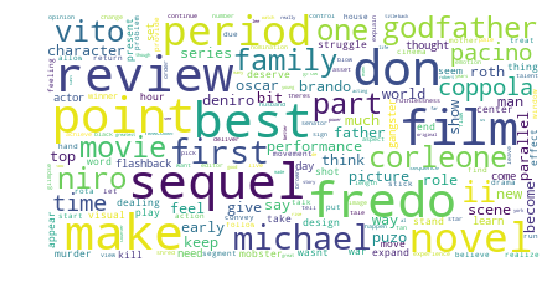

In [191]:
plt.imshow(wc13)
plt.axis("off")
plt.show()

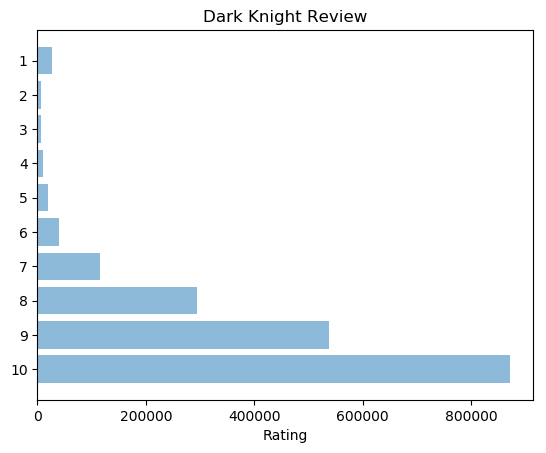

In [192]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (871345, 537708, 294005, 114764, 40028, 19625, 9586, 7139, 6422, 27839)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Dark Knight Review')
 
plt.show()

In [193]:
# Number of Vote of Dark Knight
sum(votes)

1928461

In [38]:
#The Dark Knight Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0468569/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Film surpasses the hype


Review: We've been subjected to enormous amounts of hype and marketing for the Dark Knight. We've seen Joker scavenger hunts and one of the largest viral campaigns in advertising history and it culminates with the actual release of the movie.Everything that's been said is pretty much spot on. This is the first time I can remember where a summer blockbuster film far surpasses the hype.For as much action as there is in this movie, it's the acting that makes it a great piece of work. Between all the punches, explosions and stunt-work is some great dialog work. All the actors have their moments.Bale's Batman is the definitive Batman because we see everything in this character finally on film. Martial arts skills, cunning, great tactical thinking, forensic application, technological genius to advance or improve Luscious Fox's inventions/technological breakthroughs, intimidating personality, and even a little swashbuckling. As for Heath, yes he gets credit f

In [39]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('The Dark Knight.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 94
batman : 87
film : 78
joker : 68
dark : 60
one : 53
knight : 47
best : 38
action : 35
heath : 35
ledger : 30
good : 30
 : 30
performance : 29
great : 28
made : 27
time : 26
title: : 25
review: : 25
see : 25
really : 25
character : 24
well : 23
dont : 23
nolan : 22
much : 21
even : 21
will : 21
gotham : 20
bale : 19
films : 19
hes : 18
christopher : 18
begins : 17
harvey : 17
many : 17
far : 16
say : 16
city : 16
feel : 16
think : 15
seen : 14
makes : 14
ledgers : 14
im : 14
dent : 14
movies : 14
christian : 14
every : 14
plot : 14
bruce : 14
thats : 13
villain : 13
didnt : 13
real : 13
way : 13
two : 13
new : 13
long : 13
eckhart : 13
quite : 13
away : 13
story : 12
people : 12
face : 12
now : 12
superhero : 12
better : 12
first : 11
little : 11
comic : 11
though : 11
going : 11
actually : 11
wayne : 11
thought : 11
big : 11
role : 10
still : 10
cant : 10
batmans : 10
without : 10
must : 10
aaron : 10
go : 10
want : 10
top : 10
man : 10
doesnt : 10
work : 9
finally : 9
somet

campaigns : 1
culminates : 1
actual : 1
movieeverything : 1
summer : 1
hypefor : 1
stuntwork : 1
momentsbales : 1
arts : 1
tactical : 1
forensic : 1
application : 1
advance : 1
luscious : 1
foxs : 1
inventionstechnological : 1
breakthroughs : 1
intimidating : 1
swashbuckling : 1
recognize : 1
chris : 1
treatment : 1
manifesto : 1
stance : 1
average : 1
interesting : 1
drafted : 1
difficult : 1
greatthis : 1
listen : 1
dreams : 1
wednesday : 1
lives : 1
gone : 1
sold : 1
underneath : 1
skin : 1
faith : 1
earth : 1
nicolsons : 1
1989 : 1
signed : 1
kidding : 1
versions : 1
nominations : 1
charismatic : 1
driving : 1
treating : 1
puppets : 1
strings : 1
control : 1
romance : 1
horror : 1
study : 1
detective : 1
whos : 1
thrill : 1
shown : 1
normally : 1
name : 1
names : 1
happenbruce : 1
double : 1
lost : 1
inspiring : 1
dressing : 1
waltzes : 1
town : 1
reveal : 1
dealt : 1
named : 1
classy : 1
alike : 1
completes : 1
relying : 1
horrific : 1
position : 1
die : 1
become : 1
villainall : 

storyline : 1
twists : 1
rewarding : 1
developed : 1
whats : 1
craft : 1
flows : 1
conclusionduring : 1
bike : 1
vs : 1
called : 1
relation : 1
himselfthe : 1
annoying : 1
praised : 1
satisfied : 1
audiences : 1
slowly : 1
surprising : 1
watchgreat : 1
enjoyable : 1
lighting : 1
moods : 1
displayedgreat : 1
timethis : 1
behalf : 1
nowi : 1
ahead : 1
sorry : 1
spoilers : 1
everywhere : 1
qualify : 1
distinction : 1
unquestionable : 1
excellence : 1
ridiculously : 1
number : 1
regard : 1
exploitsit : 1
unpredictable : 1
ruthless : 1
unrelenting : 1
arguably : 1
inconsistencies : 1
accepted : 1
embraced : 1
frank : 1
example: : 1
sequence : 1
clever : 1
bank : 1
heist : 1
spearheaded : 1
crazed : 1
partners : 1
caper : 1
simple : 1
colleagues : 1
burns : 1
underworlds : 1
combined : 1
fortune : 1
overtly : 1
motivated : 1
bitso : 1
factor : 1
uneven : 1
scripting : 1
therebut : 1
nitpicking : 1
comparison : 1
greater : 1
faults : 1
circumstances : 1
planet : 1
solar : 1
system : 1
execute

In [40]:
wc14 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [41]:
wc14.generate(wordcloud)

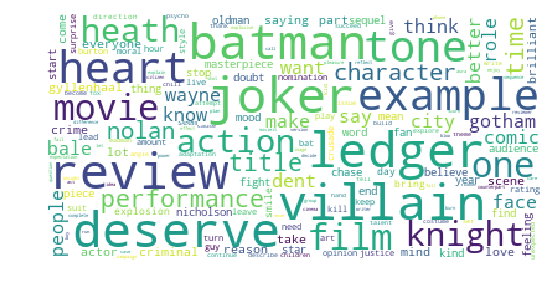

In [42]:
plt.imshow(wc14)
plt.axis("off")
plt.show()

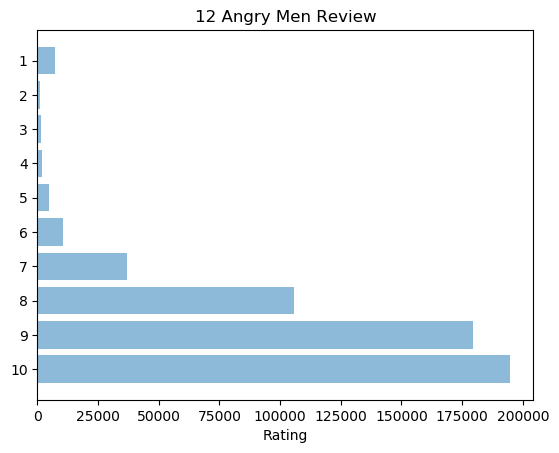

In [20]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (194585, 179357, 105897, 37119, 10483, 4765, 2003, 1392, 1272, 7314)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('12 Angry Men Review')
 
plt.show()

In [21]:
# Number of Vote of 12 Angry Men
sum(votes)

544187

In [22]:
#The 12 Angry Men Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0050083/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Excellent


Review: An excellent courtroom drama with a unique twist. Instead of following the trial itself, the viewer has a unique chance to observe the events behind the closed doors of a jury room. The film begins with the end of the trial. The jurors retire to deliberate the case. A preliminary vote is taken and the result is 11:1 in favour of the guilty verdict. Eleven jurors have raised their hands to convict a young man of killing his father. Only Juror #8 has doubts. At first even he does not truly believe the young man to be innocent but notes (rightfully) that the case for the defence might have been presented in a more convincing manner and that the boy might be given the benefit of a doubt. Since the boy is to be executed if found guilty his life is now in the hands of the jury and juror #8 reasons that the least they could do is talk about the case a bit. As time goes on some of the jurors change their minds and find that there is perhaps enough reasonable doubt n

In [23]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open('12 Angry Men.txt', encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

film : 110
 : 86
one : 75
movie : 50
men : 49
fonda : 47
jurors : 43
great : 43
jury : 38
case : 35
man : 34
room : 33
12 : 32
angry : 30
guilty : 29
henry : 29
juror : 28
title: : 25
review: : 25
boy : 24
way : 23
characters : 23
doubt : 20
time : 20
see : 20
jack : 19
life : 18
really : 18
make : 18
character : 17
lee : 17
cobb : 17
people : 17
even : 16
much : 16
j : 16
made : 16
actors : 16
films : 15
acting : 15
many : 15
excellent : 14
verdict : 14
reasonable : 14
best : 14
seen : 14
cast : 14
classic : 14
well : 13
say : 13
lumet : 13
young : 12
first : 12
justice : 12
something : 12
twelve : 12
know : 12
father : 11
accused : 11
murder : 11
last : 11
sidney : 11
watch : 11
trial : 10
everything : 10
anyone : 10
never : 10
klugman : 10
scene : 10
simple : 9
seems : 9
fact : 9
old : 9
today : 9
human : 9
evidence : 9
movies : 9
real : 9
may : 9
good : 9
lumets : 9
go : 9
lot : 9
moviejuror : 9
hands : 8
find : 8
take : 8
comes : 8
done : 8
think : 8
look : 8
top : 8
joseph : 8
sw

somehow : 1
signs : 1
mental : 1
instability : 1
overjuror : 1
stockbroker : 1
cool : 1
heartless : 1
feelings : 1
passions : 1
conspicuous : 1
jacket : 1
dayjuror : 1
stress : 1
unwillingly : 1
paradoxically : 1
compassion : 1
ironically : 1
doesjuror : 1
readily : 1
admitting : 1
qualified : 1
offer : 1
explanations : 1
worries : 1
mistakejuror : 1
throughout : 1
baseball : 1
fixing : 1
speed : 1
soon : 1
evil : 1
morality : 1
botherjuror : 1
caring : 1
tries : 1
seemingly : 1
oddsjuror : 1
wise : 1
casejuror : 1
horrifying : 1
tragedy : 1
position : 1
cut : 1
accentuate : 1
differencejuror : 1
immigrant : 1
methodical : 1
mannered : 1
soft : 1
spoken : 1
respects : 1
willing : 1
sides : 1
loses : 1
temper : 1
horrified : 1
indifference : 1
#7juror : 1
learnt : 1
agreeing : 1
thinkthe : 1
distinct : 1
bombs : 1
car : 1
chases : 1
shakespeare : 1
bees : 1
captivates : 1
personalitythe : 1
draws : 1
start : 1
imagine : 1
discomfort : 1
belittle : 1
mock : 1
share : 1
victories : 1
enth

extension : 1
joad : 1
grapes : 1
wrath : 1
formidable : 1
opponent; : 1
coolheaded : 1
holdout : 1
bases : 1
wears : 1
thin : 1
poorly : 1
revolting : 1
register : 1
wellthis : 1
conveys : 1
sweaty : 1
tensionfilled : 1
feels : 1
oppressive : 1
thanks : 1
counting : 1
paces : 1
hinges : 1
drops : 1
floor : 1
feet : 1
choices : 1
prevent : 1
static : 1
stagyan : 1
already : 1
listgrade: : 1
everybody : 1
impartialhere : 1
supposedly : 1
stabbed : 1
ask : 1
threshold : 1
reached : 1
trick : 1
leaves : 1
prosecuting : 1
retroactively : 1
jurorswriting : 1
ignored : 1
roses : 1
indelibly : 1
implanted : 1
brain : 1
limited : 1
span : 1
100 : 1
accomplishes : 1
feat : 1
undue : 1
speechifying : 1
pontificating : 1
injustice : 1
expositional : 1
half : 1
hour : 1
explain : 1
occupations : 1
mediocre : 1
screenplays : 1
gun : 1
id : 1
partiality : 1
toughest : 1
nut : 1
crack : 1
acquittal : 1
emotion : 1
arrogance : 1
fast : 1
paced : 1
hundred : 1
whiz : 1
dull : 1
stretch : 1
anywhereand 

progressives : 1
proposing : 1
us; : 1
1957although : 1
drawing : 1
pigheaded : 1
conservative : 1
versus : 1
righteous : 1
necessary : 1
ways : 1
advancedalso : 1
interesting : 1
simplicity; : 1
relies : 1
greatly : 1
minimalism : 1
embraces : 1
tactics : 1
unnoticed : 1
absolute : 1
madeperiod : 1
exceptional : 1
student : 1
writers : 1
imaginea : 1
filmed : 1
99% : 1
roomaside : 1
virtual : 1
supporting : 1
1950sand : 1
unfortunately : 1
parodied : 1
copied : 1
originality : 1
blunted : 1
oddly : 1
parodies : 1
came : 1
odd : 1
couplewhich : 1
starred : 1
turns : 1
psychiatrist : 1
sexist : 1
fifties : 1
automatic : 1
unusual : 1
herethen : 1
scenes : 1
produces : 1
switchblade : 1
perpetrator : 1
allegedly : 1
used : 1
someone : 1
yelled : 1
mistrialin : 1
50 : 1
united : 1
instruction : 1
free : 1
sequestered : 1
instructed : 1
independent : 1
assigned : 1
apartment : 1
block : 1
routes : 1
bmt : 1
subway : 1
stop : 1
subways : 1
downtown : 1
brooklyn : 1
irt : 1
next : 1
weeks : 

In [24]:
wc15 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [25]:
wc15.generate(wordcloud)

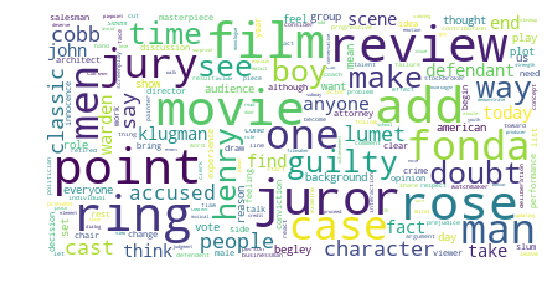

In [26]:
plt.imshow(wc15)
plt.axis("off")
plt.show()

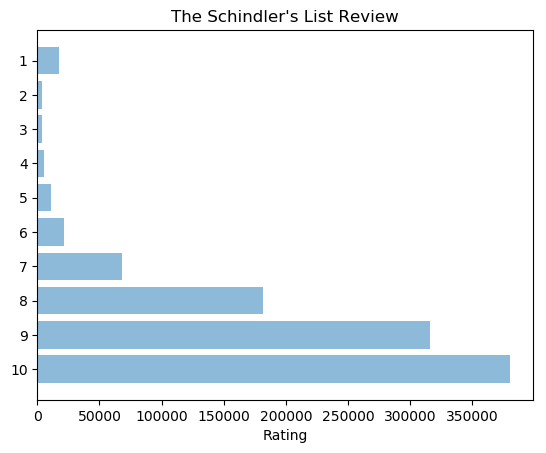

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (380264, 315874, 182045, 67965, 21483, 10944, 5127, 4032, 3877, 17541)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Schindler's List Review")
 
plt.show()

In [28]:
# Number of Vote of The Schindler's List
sum(votes)

1009152

In [29]:
#The Schindler's List Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0108052/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  don't take this personally


Review: Perhaps I should be shot, but I think four minutes of "Springtime for Hitler" is a more ingenious and powerful argument against anti-Semitism than four hours of "Shoah."Many Jews attribute the resilience of their culture to a capacity for laughter in the face of catastrophe. As Saul Bellow said, "Oppressed people tend to be witty." Pogroms didn't start with Hitler; by the time the Spanish Inquisition burned a hundred thousand Jews, the story of Jewish oppression already could fill many volumes. Many peoples once multitudinous have perished from the earth: there are no Carthaginians left. There are no more Thracians to speak of. The Celts live only in musical traditions and some old literature, having been subsumed by their conquerors. Their gods are dead, and their languages, or nearly so. But the Jews thrive on. Something kept hope alive under Stalin, under Isabella, under the Caesars. A sense of humor is a great virtue, not to be undervalu

In [30]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("The Schindler's List.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

film : 72
holocaust : 48
movie : 44
one : 41
spielberg : 36
title: : 25
review: : 25
schindler : 24
people : 23
schindlers : 21
 : 20
really : 19
list : 18
good : 17
many : 16
us : 16
propaganda : 15
films : 15
jews : 14
time : 14
make : 14
way : 13
best : 13
movies : 13
spielbergs : 13
story : 12
something : 12
nazi : 12
man : 12
bad : 11
made : 11
know : 11
might : 10
even : 10
much : 10
every : 10
evil : 10
dont : 9
didnt : 9
point : 9
character : 9
moral : 9
will : 9
feel : 9
think : 8
great : 8
life : 8
steven : 8
acting : 8
worst : 8
human : 8
saving : 8
doesnt : 8
war : 8
making : 8
trying : 8
hope : 7
message : 7
fact : 7
liam : 7
neeson : 7
well : 7
still : 7
black : 7
white : 7
say : 7
boring : 7
picture : 7
saved : 7
always : 6
american : 6
takes : 6
go : 6
private : 6
ryan : 6
nazis : 6
happened : 6
see : 6
oscar : 6
goeth : 6
doubt : 6
shallow : 6
hollywood : 6
take : 5
powerful : 5
horror : 5
real : 5
need : 5
death : 5
political : 5
subject : 5
depth : 5
love : 5
never :

differences : 1
manifested : 1
size : 1
tip : 1
barmaid : 1
consequences : 1
magnified : 1
unlikely : 1
heroic : 1
figure : 1
loathed : 1
prison : 1
commandant : 1
elevates : 1
sainthood : 1
status : 1
psychopath : 1
sanitizing : 1
boozing : 1
gambling : 1
womanizing : 1
demonizing : 1
severs : 1
connection : 1
ironically : 1
blunts : 1
conflict : 1
adolf : 1
chilling : 1
charles : 1
unlike : 1
dismiss : 1
psychotic : 1
faceless : 1
functionary : 1
orders : 1
heard : 1
circumstances : 1
diminishes : 1
accomplishment : 1
inspiration : 1
saints : 1
problems : 1
rest : 1
gaping : 1
chasm : 1
fine : 1
line : 1
tread : 1
fortunately : 1
determines : 1
barmaids : 1
salaryspielberg : 1
develop : 1
simple : 1
preferring : 1
impress : 1
grandiose : 1
underskilled : 1
souschef : 1
drowning : 1
filet : 1
mignon : 1
overly : 1
sauce : 1
quality : 1
ingredients : 1
shine : 1
clumsy : 1
handling : 1
reminds : 1
event : 1
unfortunate : 1
reminder : 1
timeless : 1
parable : 1
sake : 1
antisemitic : 1


In [31]:
wc16 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [32]:
wc16.generate(wordcloud)

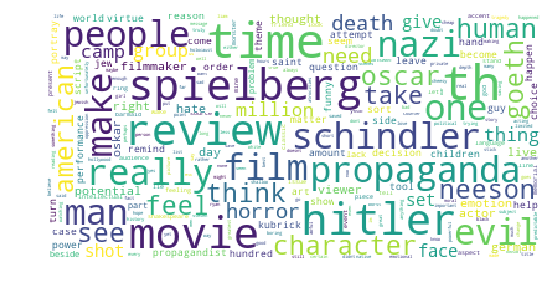

In [33]:
plt.imshow(wc16)
plt.axis("off")
plt.show()

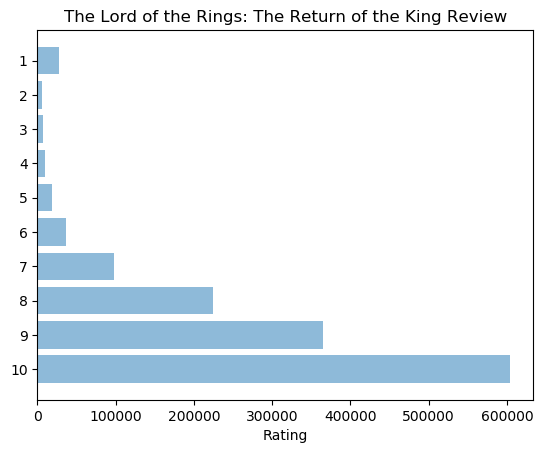

In [34]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (603688, 364684, 225046, 98368, 37051, 18394, 9180, 7118, 5913, 27159)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Lord of the Rings: The Return of the King Review")
 
plt.show()

In [35]:
# Number of Votes of The Lord of the Rings: The Return of the King Review
sum(votes)

1396601

In [36]:
# The The Lord of the Rings: The Return of the King Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0167260/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Unprecedented.


Review: Peter Jackson has done it.  He has created an all-encompassing epic saga of Tolkien's Lord of the Rings books, and after coming away from the final chapter, how does this rate not only as a film on its own, but as a part of the whole?Perfect.I've never seen a series like this.  A trilogy of movies created with such love and care and utter perfection of craft that you can't help but walk away and wonder how did Peter Jackson make this possible?  I have always loved the original "Star Wars" and "Indiana Jones" series for their epic storytelling, and just for just fitting in as a great moment in cinema. This should be, will be, remembered with as much revered fondness for generations to come.  They do not make films like these anymore.As a stand alone film, it picks up immediately where "Two Towers" ends, so brush up before seeing it.  I've read the books, and the anticipation of seeing some of the more profound moments in this film made me kind of view it

In [37]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("The Lord of the Rings_The Return of the King.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

film : 112
 : 85
one : 56
jackson : 55
king : 52
movie : 46
battle : 45
two : 44
trilogy : 42
films : 41
will : 40
story : 38
epic : 33
best : 33
frodo : 32
much : 31
ring : 31
lord : 30
return : 30
peter : 29
rings : 28
even : 28
book : 27
tolkiens : 26
made : 26
characters : 26
sam : 26
title: : 25
review: : 25
character : 25
minas : 25
great : 24
end : 24
many : 24
well : 24
tirith : 23
final : 22
towers : 22
effects : 22
three : 22
good : 22
really : 22
scene : 22
never : 21
gollum : 20
first : 20
gandalf : 20
time : 20
see : 19
fellowship : 19
true : 19
way : 19
still : 19
scenes : 19
part : 18
last : 18
movies : 17
tolkien : 17
jacksons : 17
make : 16
ending : 16
acting : 16
seen : 15
whole : 15
denethor : 15
cinema : 14
fantasy : 14
sauron : 14
rotk : 14
power : 13
special : 13
screen : 13
astin : 13
new : 13
thats : 13
us : 13
gondor : 13
aragorn : 13
pippin : 13
makes : 13
cinematic : 13
done : 12
read : 12
far : 12
im : 12
may : 12
another : 12
left : 12
deep : 12
hobbits : 1

evocative : 2
awesome : 2
witnessed : 2
mention : 2
wellpaced : 2
hadnt : 2
guy : 2
deftly : 2
broken : 2
tested : 2
commanding : 2
whilst : 2
ingenious : 2
varied : 2
cities : 2
physical : 2
accuracy : 2
notice : 2
decapitated : 2
trilogies : 2
filmsthe : 2
isnt : 2
small : 2
often : 2
reason : 2
filming : 2
fairly : 2
dazzling : 2
land : 2
warring : 2
75% : 2
pulled : 2
delivered : 2
girls : 2
everywhere : 2
wasnt : 2
continued : 2
close : 2
hopefully : 2
pacing : 2
sounds : 2
field : 2
individual : 2
inside : 2
children : 2
decade : 2
trust : 2
prepare : 2
hold : 2
reviews : 2
fan : 2
blind : 2
faults : 2
majority : 2
manages : 2
annoying : 2
ironically : 2
ie : 2
loose : 2
etc : 2
crawl : 2
momentum : 2
minor : 2
grand : 2
scheme : 2
oh : 2
serves : 2
funny : 2
secondary : 2
deserved : 2
shame : 2
lee : 2
works : 2
game : 2
noticed : 2
draw : 2
fault : 2
hard : 2
closure : 2
finish : 2
satisfaction : 2
vital : 2
biggest : 2
march : 2
additional : 2
aspect : 2
foremost : 2
slight : 

impaired : 1
proliferation : 1
style : 1
slambang : 1
mortensens : 1
sincerity : 1
conviction : 1
graceful : 1
stylish : 1
mention: : 1
galadriels : 1
enigmatic : 1
alluring : 1
halfsmiling : 1
glance : 1
disappears : 1
cate : 1
blanchett : 1
versatile : 1
actresses : 1
today : 1
incarnate : 1
exploration : 1
ringmy : 1
overlong : 1
bloated : 1
watchable : 1
marvellous : 1
gollumdespite : 1
discrepancy : 1
extremely : 1
winners : 1
term : 1
mindblowing : 1
makeup : 1
tailored : 1
distract : 1
authenticthe : 1
ethereal : 1
charming : 1
darker : 1
merges : 1
result : 1
mixture : 1
charm : 1
darkness : 1
etherality : 1
compelling : 1
screenplay : 1
wellwritten : 1
literate : 1
fly : 1
seamlessly : 1
engaging : 1
steal : 1
inthe : 1
bloomwho : 1
dashing : 1
uncharismatic : 1
bland : 1
likable : 1
captures : 1
mortenssen : 1
charismatic : 1
design : 1
sarauman : 1
resultall : 1
entry : 1
bethany : 1
cox : 1
3: : 1
threepart : 1
piece : 1
imdb : 1
multipart : 1
essay : 1
click : 1
screenname

lesnie`s : 1
instalment : 1
robbed : 1
night : 1
stop : 1
recognising : 1
genuis : 1
culmination : 1
fires : 1
cylinders : 1
thanlife : 1
learning : 1
surroundings : 1
unleashed : 1
effectwith : 1
indisputably : 1
sequel : 1
nab : 1
guessed : 1
ii : 1
designs : 1
visually : 1
striking : 1
balanced : 1
electrifying : 1
substantial : 1
staying : 1
cease : 1
amaze : 1
presents : 1
odyssey : 1
selfrealization : 1
introduced : 1
9 : 1
individuals : 1
seemingly : 1
bloodcurdling : 1
goal : 1
destroying : 1
saving : 1
process : 1
presented : 1
transcend : 1
operate : 1
biblical : 1
fashion : 1
lotr: : 1
gimil : 1
countless : 1
guys : 1
villains : 1
goblins : 1
demons : 1
dragons : 1
horrifying : 1
recall : 1
pass : 1
carrying : 1
iconic : 1
justice; : 1
immortal : 1
f****** : 1
ringsabove : 1
philosophies : 1
showcasing : 1
process; : 1
resonant : 1
comingofage : 1
superlatives : 1
magical : 1
alltime : 1
celluloid : 1
mostanticipated : 1
installments : 1
instantly : 1
ingrained : 1
publics :

In [38]:
wc17 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [39]:
wc17.generate(wordcloud)

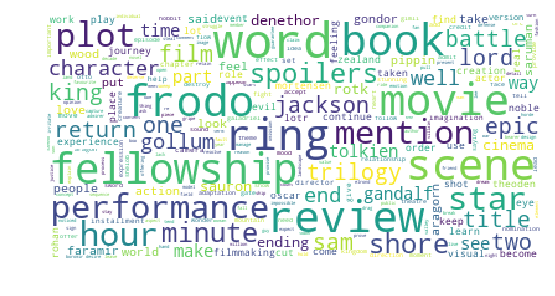

In [40]:
plt.imshow(wc17)
plt.axis("off")
plt.show()

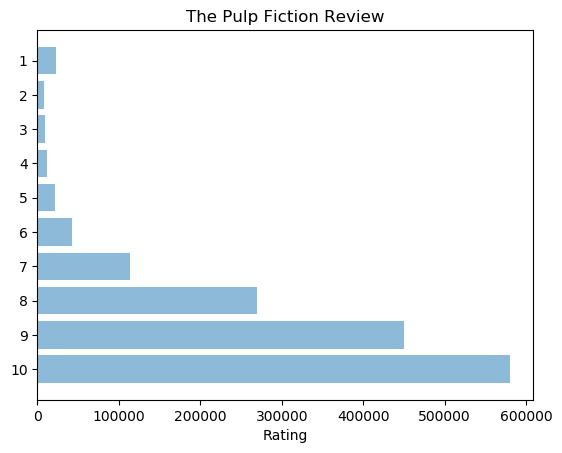

In [41]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (579787, 450353, 269403, 114108, 42293, 22206, 11788, 9004, 7899, 23168)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Pulp Fiction Review")
 
plt.show()

In [42]:
# Number of Votes of Pulp Fiction
sum(votes)

1530009

In [43]:
# The Pulp Fiction Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0110912/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  The masterpiece without a message


Review: One of the early scenes in "Pulp Fiction" features two hit-men discussing what a Big Mac is called in other countries. Their dialogue is witty and entertaining, and it's also disarming, because it makes these two thugs seem all too normal. If you didn't know better, you might assume these were regular guys having chit-chat on their way to work. Other than the comic payoff at the end of the scene, in which they use parts of this conversation to taunt their victims, their talk has no relevance to anything in the film, or to anything else, for that matter. Yet without such scenes, "Pulp Fiction" wouldn't be "Pulp Fiction." I get the sense that Tarantino put into the film whatever struck his fancy, and somehow the final product is not only coherent but wonderfully textured.It's no wonder that fans spend so much time debating what was in the suitcase, reading far more into the story than Tarantino probably intended. The film is so intricat

In [44]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("The Pulp Fiction.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 81
film : 65
one : 42
tarantino : 33
pulp : 32
fiction : 31
 : 27
people : 27
characters : 25
review: : 24
best : 24
story : 23
title: : 23
movies : 21
many : 20
time : 19
great : 18
think : 17
much : 15
even : 15
jackson : 15
films : 14
something : 14
really : 14
good : 14
dialogue : 13
scene : 13
first : 13
samuel : 13
l : 13
seen : 12
actually : 12
travolta : 12
two : 11
know : 11
way : 11
far : 11
never : 11
dont : 11
will : 11
made : 11
work : 10
end : 10
plot : 10
im : 10
bruce : 10
willis : 10
didnt : 9
action : 9
every : 9
say : 9
different : 9
see : 9
masterpiece : 8
anything : 8
come : 8
thats : 8
point : 8
years : 8
still : 8
well : 8
amazing : 8
nothing : 8
quentin : 8
believe : 8
without : 7
scenes : 7
talk : 7
ive : 7
whole : 7
tarantinos : 7
character : 7
jules : 7
full : 7
vincent : 7
sequence : 7
stories : 7
violence : 7
john : 7
top : 7
watch : 7
second : 7
script : 7
make : 7
though : 7
thing : 7
sense : 6
put : 6
style : 6
acting : 6
always : 6
away : 6
simp

copying : 1
stealing : 1
artist : 1
inspired : 1
influenced : 1
artists : 1
impossible : 1
recognize : 1
breath : 1
fresh : 1
air : 1
looked : 1
influential : 1
everything: : 1
performances : 1
sam : 1
jackson; : 1
sizzling : 1
iconic : 1
written; : 1
arguably : 1
nonoriginal : 1
soundtracks : 1
inspirational : 1
dizzy : 1
well: : 1
10favorite : 1
films: : 1
http:wwwimdbcomlistmkjokvqlsbslesserknown : 1
masterpieces: : 1
http:wwwimdbcomlistls070242495favorite : 1
tvshows : 1
reviewed: : 1
http:wwwimdbcomlistls075552387 : 1
century : 1
brain : 1
skull : 1
rear : 1
window : 1
users : 1
minority : 1
someway : 1
mass : 1
smiles : 1
souls : 1
schematic : 1
heroes : 1
forget : 1
twinkle : 1
beings : 1
burger : 1
king : 1
tv : 1
series : 1
massage : 1
earn : 1
selling : 1
cinematography : 1
humour : 1
viewers : 1
taken : 1
entertwine : 1
proves : 1
master : 1
allow : 1
moment : 1
boredom : 1
fixed : 1
boxing : 1
match : 1
mob : 1
boss : 1
order : 1
fits : 1
mysteries : 1
inside : 1
bandaid : 

lets : 1
reserve : 1
category : 1
geared : 1
towards : 1
geeks : 1
ludicrously : 1
inflated : 1
reputation : 1
hugely : 1
trivial : 1
grotesque : 1
vacuum : 1
deadly : 1
slowness : 1
length : 1
hour : 1
incomprehensible : 1
rave : 1
boardthe : 1
depicts : 1
authentic : 1
development : 1
idiotically : 1
handguns : 1
repeatedly : 1
simultaneously : 1
hanging : 1
summon : 1
lawperhaps : 1
played : 1
hoodlum : 1
playmates : 1
complains : 1
divorce : 1
returns : 1
garage : 1
offwhere : 1
compass : 1
revere : 1
schoolboy : 1
nonsense : 1
remotely : 1
principled : 1
except : 1
pawnbroker : 1
evil : 1
releases : 1
leatherstudded : 1
sadist : 1
cage : 1
rubbish : 1
deployed : 1
featureits : 1
hear : 1
protest : 1
stature : 1
capable : 1
instructing : 1
integrating : 1
blood : 1
f****** : 1
spirituality : 1
problems : 1
defined : 1
trend : 1
contemporary : 1
godawful : 1
clones : 1
pouring : 1
mainstream : 1
alike : 1
detract : 1
subtlety : 1
admit : 1
redemptionspeech : 1
imitators : 1
midst : 

In [45]:
wc18 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [46]:
wc18.generate(wordcloud)

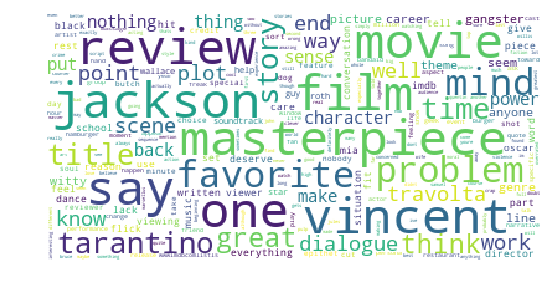

In [47]:
plt.imshow(wc18)
plt.axis("off")
plt.show()

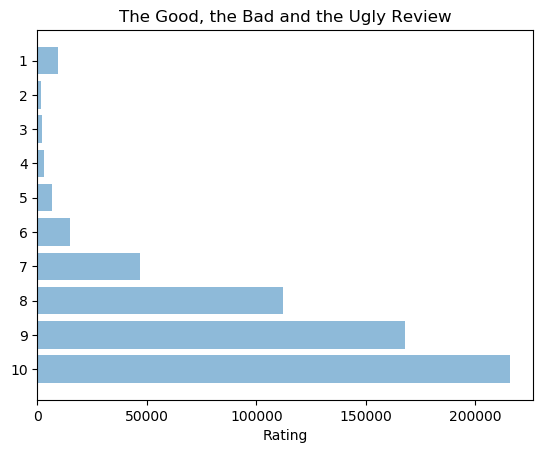

In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (215667, 167970, 112124, 46937, 14814, 6859, 2985, 2103, 1804, 9607)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Good, the Bad and the Ugly Review")
 
plt.show()

In [49]:
# Number of Votes The Good, the Bad and the Ugly
sum(votes)

580870

In [50]:
# The Good, the Bad and the Ugly Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0060196/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  An epic Sergio Leone's masterpiece the best spaghetti gold Western film in the Dollars Trilogy!


Review: The Good, the Bad and the Ugly (1966) is an epic classic Sergio Leone's masterpiece film and a great conclusion to "the Man with No Name" Trilogy. This is my number 1 favorite Spaghetti Western about the Civil War and three gunslingers on a search for a lost gold. I love this film to death. It is my personal favorite western movie of all time. Clint Eastwood, Eli Wallach and Lee Van Cleef are the best of the film in their roles. It has a great showdown in the cemetery on the end of the film, the way how it is edited. The cuts with people's faces and close up shots. I love this film to death and it is my number one favorite western in the trilogy. If I had to put then into a 'favorite ranking' list? 1. The Good, The Bad and The Ugly, 2. A Fistful of Dollars and For a Few Dollars More. Those are all three best masterpieces ! They are my favorite Clint Eastwood western movies 

In [51]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("The Good, the Bad and the Ugly.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

film : 106
good : 75
one : 71
 : 62
movie : 58
bad : 55
tuco : 51
ugly : 50
western : 43
leone : 43
time : 41
best : 39
three : 33
eastwood : 32
gold : 27
leones : 26
van : 26
music : 26
cleef : 25
sergio : 24
blondie : 24
title: : 23
review: : 23
great : 23
clint : 23
wallach : 23
westerns : 22
first : 22
films : 22
dollars : 21
war : 21
two : 21
scenes : 21
many : 20
eyes : 20
way : 19
scene : 19
much : 19
eli : 18
seen : 18
trilogy : 17
man : 17
lee : 17
think : 17
angel : 17
story : 16
fact : 16
even : 16
civil : 15
made : 15
long : 15
will : 15
character : 15
favorite : 14
better : 14
greatest : 14
never : 14
another : 14
john : 14
see : 14
name : 13
movies : 13
spaghetti : 12
really : 12
now : 12
dont : 12
action : 11
men : 11
characters : 11
people : 11
every : 11
desert : 11
director : 11
love : 10
score : 10
theme : 10
brilliant : 10
without : 10
cool : 10
guy : 10
ive : 10
world : 10
upon : 10
picture : 10
makes : 9
final : 9
yet : 9
memorable : 9
theres : 9
going : 9
nothing

control : 2
suits : 2
forces : 2
audiences : 2
straight : 2
power : 2
onto : 2
numerous : 2
free : 2
30 : 2
remember : 2
night : 2
behind : 2
trademark : 2
opposite : 2
church : 2
god : 2
universally : 2
statement : 2
ideas : 2
brings : 2
antiwar : 2
directly : 2
background : 2
talk : 2
enjoyable : 2
composes : 2
members : 2
restored : 2
act : 2
late : 2
result : 2
flow : 2
motion : 2
admit : 2
including : 2
consider : 2
according : 2
help : 2
loot : 2
location : 2
gotten : 2
quest : 2
bill : 2
tucos : 2
cemetary : 2
era : 2
killed : 2
member : 2
examples : 2
sergios : 2
alternate : 2
worst : 2
named : 2
ultimately : 2
started : 2
knew : 2
showcase : 2
techniques : 2
fine : 2
pulled : 2
whose : 2
found : 2
paranoia : 2
images : 2
ecstasy : 2
landscape : 2
together : 2
originals : 2
boy : 2
reference : 2
* : 2
recycled : 2
international : 2
simultaneously : 2
entertaining : 2
massive : 2
works : 2
external : 2
internal : 2
threes : 2
influences : 2
national : 2
icons : 2
soft : 2
lush :

scenesequence : 1
transcends : 1
aspects : 1
humanityfor : 1
extraordinary : 1
3536 : 1
practice : 1
leave : 1
buddy : 1
reversed : 1
cross : 1
follow : 1
earnest : 1
starts : 1
burn : 1
mindset : 1
bold : 1
lifewhat : 1
success : 1
spun : 1
collaborators : 1
mistakenly : 1
near : 1
depressing : 1
due : 1
pan : 1
scan : 1
process : 1
distinct : 1
scope : 1
colli : 1
achieve : 1
dvd : 1
preferably : 1
extended : 1
noted : 1
usual : 1
collaborator : 1
landmark : 1
chops : 1
off: : 1
t : 1
reactions; : 1
cunning : 1
in; : 1
ditto : 1
skin : 1
copatriots : 1
anyone : 1
stays : 1
quite : 1
surprisingly : 1
overall : 1
endearing : 1
bravo : 1
twenty : 1
dust : 1
clears : 1
blows : 1
develops : 1
momentum : 1
shotthe : 1
blasted : 1
crashing : 1
gravestone; : 1
shot; : 1
together; : 1
shootout; : 1
confrontation; : 1
wailthe : 1
guitars : 1
leather : 1
desertits : 1
clue : 1
geographichistorical : 1
errors : 1
glaring : 1
carrying : 1
revolvers : 1
capandball : 1
pistols : 1
loading : 1
metal

In [52]:
wc19 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [53]:
wc19.generate(wordcloud)

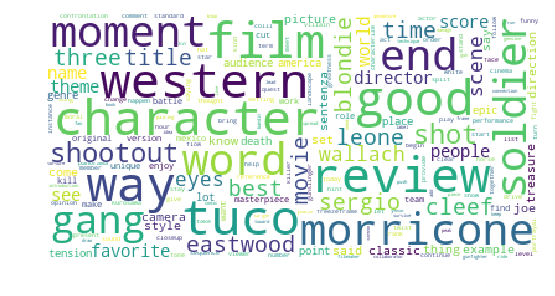

In [54]:
plt.imshow(wc19)
plt.axis("off")
plt.show()

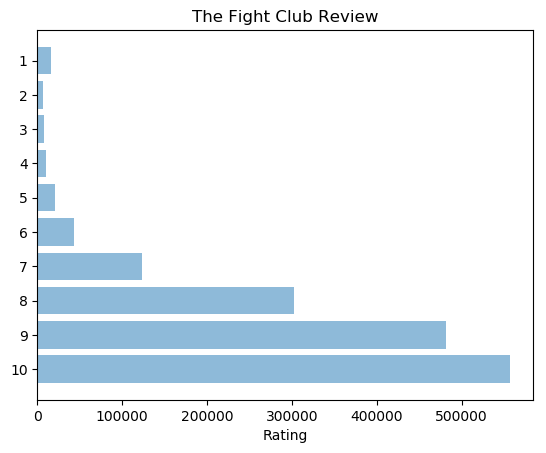

In [55]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (556729, 482091, 302297, 123447, 43366, 20565, 10503, 7553, 6226, 15709)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Fight Club Review")
 
plt.show()

In [56]:
# Number of Votes of Fight Club
sum(votes)

1568486

In [57]:
# The Fight Club Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0137523/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  A unique film


Review: Fight Club is one of the most unique films I have ever seen. In addition to presenting a rather fresh take on life, FC also presents its material in a fresh way. My main interest in the film is in that, in my opinion, it does not present characters for us to think about. Rather, it presents actions for us to think about. I will say that I cannot recall *ever* having been "asked" by a film to both suspend my disbelief the way this film asks in its third act AND at the same time come to terms with an understanding that there is no room--or need--for disbelief.Perhaps these comments will not make sense to the average movie goer who will dismiss this film--and, unfortunately, its premise--as another hollywood flick filled with gratuitous violence. I'd go as far as to say that this film is not about violence. It is about choices. It is about activity. It is about lethargy. It is about waking up and realizing that at some point in the past we've gone to the to

In [58]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Fight Club.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

film : 92
movie : 85
fight : 52
club : 47
people : 35
one : 33
life : 27
title: : 25
review: : 25
pitt : 24
will : 23
norton : 23
time : 22
 : 22
best : 21
see : 20
seen : 19
think : 19
great : 19
way : 18
even : 18
society : 17
many : 16
dont : 16
book : 16
films : 15
first : 15
something : 15
fincher : 15
much : 15
tyler : 14
brad : 14
us : 13
violence : 13
go : 13
makes : 13
message : 13
movies : 12
well : 12
say : 11
read : 11
man : 11
every : 11
world : 11
really : 11
edward : 10
character : 10
david : 10
watch : 10
want : 10
two : 10
plot : 10
narrator : 10
feel : 10
made : 10
im : 9
durden : 9
work : 9
story : 9
find : 9
things : 9
actually : 9
evil : 9
take : 8
come : 8
make : 8
sense : 8
without : 8
ive : 8
tell : 8
doesnt : 8
now : 8
bit : 8
simply : 8
nothing : 8
yet : 8
youll : 8
brilliant : 8
men : 8
american : 8
far : 7
performance : 7
better : 7
perfect : 7
acting : 7
good : 7
going : 7
becomes : 7
fact : 7
especially : 7
real : 7
start : 7
consumerism : 7
history : 7
hu

anticonsumerism : 1
rant : 1
beginning : 1
trainspotting : 1
carrying : 1
logical : 1
albeit : 1
risks : 1
biting : 1
feeds : 1
insignificant : 1
cog : 1
drab : 1
machine : 1
dutifully : 1
finds : 1
joy : 1
selfhelpdealing : 1
terminal : 1
diseases : 1
sessions : 1
sleepless : 1
trashy : 1
poser : 1
enters : 1
upsets : 1
routine : 1
meets : 1
salesman : 1
straightforward : 1
honesty : 1
candor : 1
sleazy : 1
loungelizard : 1
outfits : 1
breath : 1
air : 1
bonded : 1
beers : 1
hit : 1
absurd : 1
request : 1
pound : 1
overcomes : 1
release : 1
satisfaction : 1
inflicting : 1
desensitized : 1
physical : 1
contact : 1
wakes : 1
sensation : 1
readily : 1
apparent : 1
elaborate : 1
plans : 1
organizing : 1
brawls : 1
bar : 1
pessimistic : 1
worldview : 1
married : 1
turns : 1
assembled : 1
effort : 1
$50 : 1
million : 1
anticonsumer : 1
antisociety : 1
antieverything : 1
sneaky : 1
subliminal : 1
frame : 1
subversive : 1
delight : 1
refreshing : 1
delivers : 1
explained : 1
interviews : 1
do

inventing : 1
thingi : 1
plenty : 1
arty : 1
psychological : 1
failing : 1
merely : 1
connecting : 1
suffer : 1
non : 1
reasonson : 1
twilight : 1
flirts : 1
ideals : 1
anticonformism : 1
hypocritical : 1
pretend : 1
super : 1
fighters : 1
goal : 1
beside : 1
gangs : 1
corporates : 1
easya : 1
losers : 1
passive : 1
aggressiveness : 1
rebel : 1
eff : 1
iphone : 1
17 : 1
complain : 1
low : 1
paying : 1
capitalism : 1
theyll : 1
dirty : 1
sucking : 1
calling : 1
mom : 1
stopped : 1
ggood : 1
afternoon : 1
agent : 1
sh*t : 1
mankind : 1
number : 1
spoilers : 1
minimum : 1
remain : 1
vague : 1
possiblethis : 1
broken : 1
longstanding : 1
records : 1
mine : 1
them:1 : 1
irritating : 1
knowing : 1
gotta : 1
longerto : 1
describe : 1
train : 1
understatement : 1
phrase : 1
sum : 1
colossal : 1
closest : 1
ahead : 1
knock : 1
thesaurus : 1
highrated : 1
believable : 1
coherent : 1
trolling : 1
comic : 1
britney : 1
spears : 1
tissue : 1
removed : 1
b : 1
wondering : 1
oni : 1
write : 1
thesis 

In [59]:
wc20 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [60]:
wc20.generate(wordcloud)

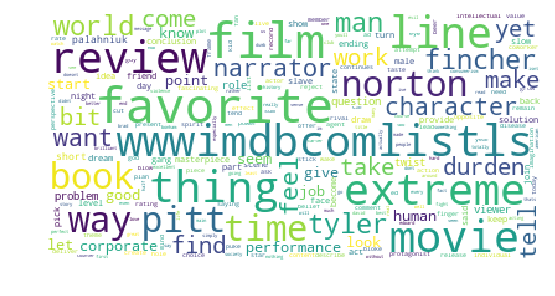

In [61]:
plt.imshow(wc20)
plt.axis("off")
plt.show()

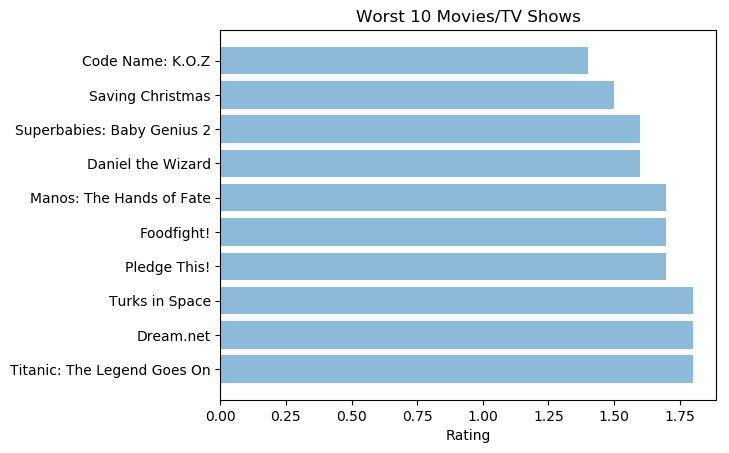

In [142]:
# Plot the bottom 10 tv shows/movies rating
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Titanic: The Legend Goes On', 'Dream.net', 'Turks in Space', 'Pledge This!', 'Foodfight!', 
          'Manos: The Hands of Fate', 'Daniel the Wizard', 'Superbabies: Baby Genius 2', 'Saving Christmas', 'Code Name: K.O.Z')
y_pos = np.arange(len(movies))
rating = (1.8, 1.8, 1.8, 1.7, 1.7, 1.7, 1.6, 1.6, 1.5, 1.4)
 
plt.barh(y_pos, rating, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Rating')
plt.title('Worst 10 Movies/TV Shows')
 
plt.show()

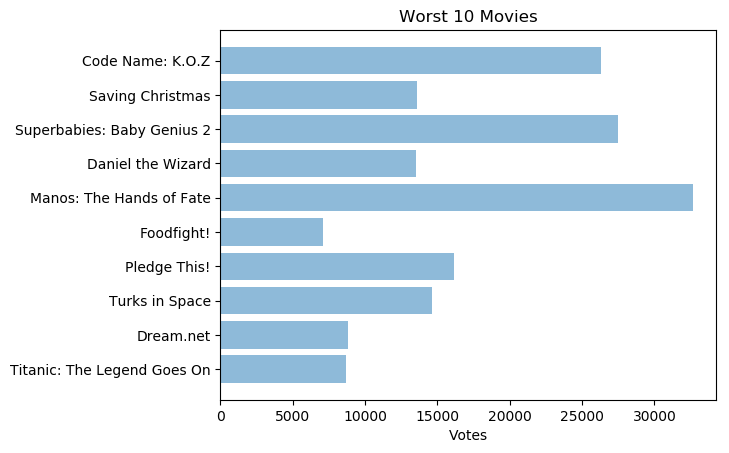

In [143]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Titanic: The Legend Goes On', 'Dream.net', 'Turks in Space', 'Pledge This!', 'Foodfight!', 
          'Manos: The Hands of Fate', 'Daniel the Wizard', 'Superbabies: Baby Genius 2', 'Saving Christmas', 'Code Name: K.O.Z')
y_pos = np.arange(len(movies))
votes = (8679, 8840, 14654, 16132, 7060, 32642, 13529, 27489, 13615, 26304)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Votes')
plt.title('Worst 10 Movies')
 
plt.show()

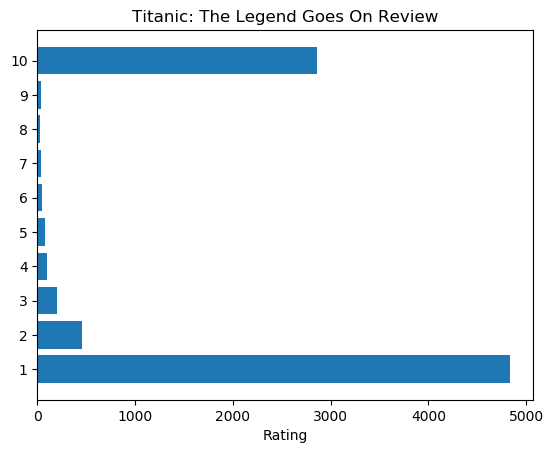

In [64]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y_pos = np.arange(len(Rating))
votes = (4831, 461, 201, 101, 81, 50, 38, 23, 42, 2856)
 
plt.barh(y_pos, votes, align='center', alpha=1.0)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Titanic: The Legend Goes On Review")

plt.show()

In [65]:
# Number of Votes of Titanic: The legend Goes On Review 
sum(votes)

8684

In [66]:
#The Titanic: The legend Goes On Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0330994/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  The first Titanic film where the iceberg is the hero


Review: OK, normally I go into a paragraph of introduction on how I came across this film and a little bit about the film or film trivia, well not this time, I'm going to let you judge for yourself on just what I'm going to tell you with this "story".The movie starts off with the ending... ??? Yeah, the ship sinks, sorry to spoil this movie for you already. But anyways we have a man and a woman rowing in a lifeboat, rowing, rowing, rowing as we hear people screaming for their lives on the sinking ship. We pan into the woman's eye into a flashback, a la Titanic(1997), and right before the same woman, Angelica, boards the Titanic, we see she is actually a servant to her evil step mother and her two evil step sisters, a la Disney's Cinderella. She has a blue colored locket necklace, a la Titanic(1997), inside there is a picture of her mother, oh what happened to her mother? Of course the evil step family taunts her pain and th

In [67]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Titanic_The Legend Goes On.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 106
film : 96
titanic : 57
one : 47
characters : 45
animation : 33
even : 32
dog : 32
ship : 30
animated : 30
really : 29
two : 28
bad : 27
time : 26
story : 26
worst : 25
rapping : 24
title: : 23
review: : 23
william : 23
animals : 23
see : 22
song : 22
scenes : 22
love : 20
well : 19
people : 19
dont : 19
make : 19
angelica : 18
made : 18
im : 17
going : 17
music : 17
watch : 17
ending : 16
mice : 16
much : 16
know : 16
little : 15
la : 15
seen : 15
version : 15
first : 14
 : 14
better : 14
good : 14
talking : 14
real : 14
doesnt : 14
lot : 14
many : 14
sinking : 13
american : 13
children : 13
start : 13
think : 13
films : 13
plot : 13
original : 13
legend : 13
101 : 12
named : 12
goes : 12
thats : 12
way : 12
movies : 12
actually : 11
cinderella : 11
happy : 11
james : 11
lady : 11
didnt : 11
disaster : 11
horrible : 11
character : 11
want : 11
go : 10
course : 10
family : 10
tail : 10
now : 10
rap : 10
cameron : 10
lets : 10
nothing : 10
got : 10
put : 10
will : 10
theres :

rush : 1
jumping : 1
deleting : 1
useless : 1
causing : 1
chance : 1
conpleterather : 1
replay : 1
jumble : 1
tiresome : 1
shot : 1
lead : 1
lucky : 1
holes : 1
cabins : 1
owners : 1
cage : 1
storage : 1
room : 1
itfinally : 1
spit : 1
unfunny : 1
humor : 1
thousands : 1
builds : 1
self : 1
stealing : 1
successful : 1
adults : 1
causes : 1
drown : 1
misery : 1
flicks : 1
usthat : 1
shakespeare : 1
opened : 1
hatred : 1
rage : 1
cry : 1
hated : 1
lacking : 1
realism : 1
oscar : 1
song: : 1
timewhen : 1
fell : 1
excellent : 1
included : 1
countless : 1
comic : 1
relief : 1
entertained : 1
drama : 1
downright : 1
cheesy : 1
pixarit : 1
catalyst : 1
offin : 1
greatest : 1
art : 1
disturbing : 1
unforgivable : 1
bother : 1
flaw : 1
simplistic : 1
sticking : 1
masking : 1
tape : 1
stick : 1
properly : 1
handle : 1
plainly : 1
unbelievable : 1
worry : 1
taking : 1
mick : 1
freezing : 1
realistic : 1
wondering : 1
beware : 1
doganimation : 1
framerate : 1
consistent : 1
antagonises : 1
audienc

copy : 1
existing : 1
wonder : 1
permission : 1
likeness : 1
proves : 1
countries : 1
animelets : 1
flashbacks : 1
laughing : 1
unorganized : 1
lame : 1
jokes : 1
ignorant : 1
itselfconclusion : 1
agree : 1
nostalgic : 1
insult : 1
fluffy : 1
historians : 1
teachers : 1
field : 1
day : 1
ashame : 1
hate : 1
possiblethe : 1
accomplishment : 1
prove : 1
friendly : 1
timeif : 1
guest : 1
advice : 1
wowthere : 1
enjoyable; : 1
examples : 1
include:1 : 1
geese : 1
oliver : 1
alice : 1
wonderl : 1
fanfiction : 1
trace : 1
accuracy : 1
unless : 1
dates : 1
20th : 1
century : 1
unbearably : 1
relatively : 1
grunts : 1
ughs : 1
development : 1
michael : 1
bay : 1
betterthe : 1
robots : 1
reels : 1
reused : 1
future : 1
gustooverall : 1
tasteless : 1
jambalaya : 1
anachronisms : 1
bestest : 1
ignore : 1
andor : 1
1410 : 1
average : 1
vote : 1
welldeveloped : 1
powerful : 1
burst : 1
ed : 1
smooth : 1
matched : 1
songsoh : 1
catchypowerfultearsheddingheartwarming : 1
100% : 1
recommended : 1
best

In [68]:
wc21 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [71]:
wc21.generate(wordcloud)

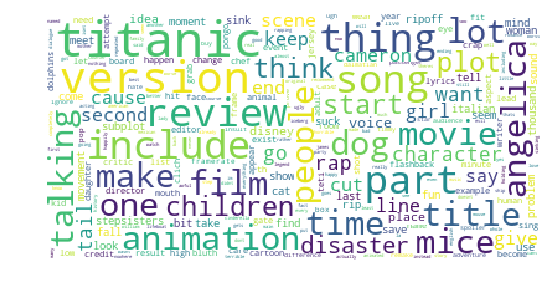

In [72]:
plt.imshow(wc21)
plt.axis("off")
plt.show()

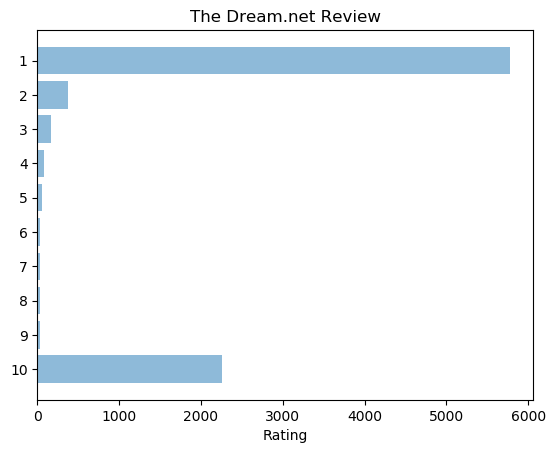

In [73]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (2259, 36, 28, 31, 38, 57, 83, 164, 377, 5775)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Dream.net Review")
 
plt.show()

In [74]:
# Number of Dream.Net Review 
sum(votes)

8848

In [75]:
#The Dream.net Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt1309000/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Really bad


Review: Even though I heard from many independent and reliable sources that this movie is bad, nay, one of the worst high-budget films ever made, I was skeptical. I have now watched it and can confirm it as one of the all-time low of international filmmaking. A drama without a single trace of suspense or excitement, a love story without a single romantic line, a teen comedy with very few traces of very trite and embarrassing humor, this movie is a MUST. Without having seen it, one will forever lack the experience of a truly, authentically, genuinely bad film.The only mystery that remains is who on earth sponsored this celluloid waste and what on earth made some of Hungary's prominent comic actors (notably Gábor Reviczky) subscribe to it.To sum up: the trite and/or hilariously out-of-place dialogs, the embarrassing discontinuities, and the sub-YouTube-dilettante quality of acting and directing make it difficult to believe that this movie was ever meant to be taken s

In [76]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Dream_Net.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 40
bad : 13
review: : 11
worst : 11
actors : 11
title: : 10
one : 10
movies : 9
hungary : 9
watch : 8
really : 6
made : 6
story : 6
acting : 6
film : 6
know : 6
regina : 6
hungarian : 6
will : 5
watching : 5
good : 5
lilla : 5
dont : 5
protagonist : 5
see : 5
without : 4
must : 4
seen : 4
life : 4
time : 4
girls : 4
think : 4
enough : 4
whole : 4
cant : 4
makes : 4
even : 3
watched : 3
love : 3
teen : 3
lack : 3
gábor : 3
reviczky : 3
make : 3
believe : 3
worse : 3
simply : 3
nice : 3
thing : 3
feel : 3
asses : 3
sense : 3
dumb : 3
people : 3
10 : 3
stars : 3
whos : 3
level : 3
wonder : 3
reason : 3
actresses : 3
gets : 3
ho : 3
soap : 3
now : 2
low : 2
drama : 2
single : 2
trace : 2
trite : 2
embarrassing : 2
experience : 2
earth : 2
seriously : 2
sorry : 2
minute : 2
average : 2
school : 2
end : 2
everything : 2
american : 2
came : 2
poor : 2
performance : 2
skills : 2
save : 2
lead : 2
actress : 2
labancz : 2
beautiful : 2
extremely : 2
little : 2
talent : 2
none : 2
youre :

In [77]:
wc22 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [78]:
wc22.generate(wordcloud)

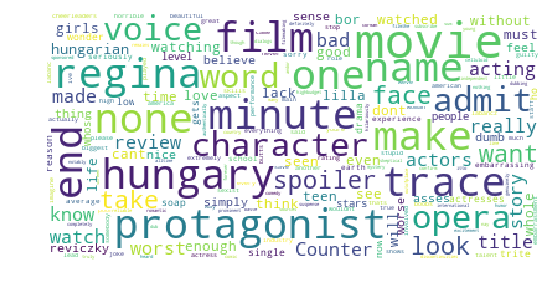

In [79]:
plt.imshow(wc22)
plt.axis("off")
plt.show()

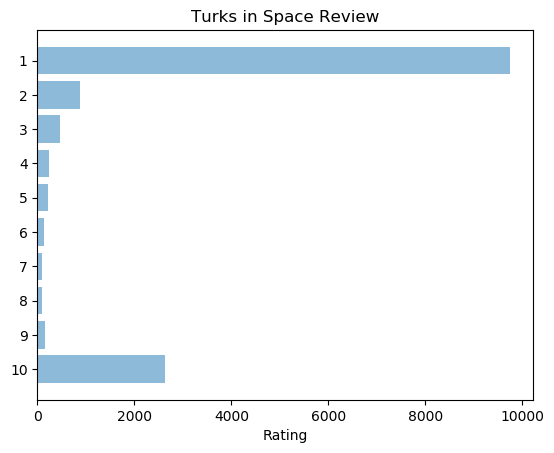

In [80]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (2631, 163, 86, 97, 132, 220, 241, 474, 877, 9741)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Turks in Space Review")
 
plt.show()

In [81]:
# Number of Votes of Turks in Space
sum(votes)

14662

In [ ]:
Title: Turks in Space Review

In [82]:
#The Turks in Space Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0808240/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Mindbogglingly awful


Review: Every major cult film fan has watched "Dunyayi Kurtaran Adam" (Man who saves the world) aka Turkish Star Wars. Quarter a century after that was released ,we get a sequel -"Dunyayi Kurtaran Adamin oglu" (Son of the man who saves the world). While the original was meant to be a serious science fiction adventure, this one attempts to be a parody of the old film and various other science fiction films in the vein of G.O.R.A. Needless to say, the result is cinematic sewage.The film is a basically a serious of gags , none of which are close to being remotely funny. The acting is even worse. Erbil has already sealed his spot in the acting hall of shame with the lame shrek-wannabe Keloglan (he was even worse than Petek Dincoz, which should tell you how amazingly bad he was). Cuneyt Arkin seems to be sleepwalking. Sinem Kobal who is one of the most promising young Turkish actresses working today, would want to erase this off her resume for her career's sak

In [85]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Turks in Space.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 74
turkish : 26
one : 26
film : 25
even : 21
movies : 19
title: : 18
review: : 18
people : 18
bad : 15
erbil : 13
kurtaran : 12
comedy : 12
really : 12
made : 11
first : 11
nothing : 11
dont : 11
turkey : 11
space : 11
sequel : 10
original : 10
say : 10
mehmet : 10
ali : 10
watch : 10
worst : 10
make : 10
good : 10
time : 10
world : 8
 : 8
well : 8
sense : 8
much : 8
many : 8
awful : 7
dunyayi : 7
adam : 7
thing : 7
see : 7
turks : 7
watched : 6
man : 6
star : 6
acting : 6
cinema : 6
money : 6
waste : 6
think : 6
cult : 5
adamin : 5
films : 5
funny : 5
script : 5
point : 5
doesnt : 5
way : 5
understand : 5
dünyayi : 5
seriously : 5
go : 5
may : 5
culture : 5
every : 4
wars : 4
oglu : 4
old : 4
close : 4
tell : 4
arkin : 4
want : 4
minutes : 4
feel : 4
act : 4
come : 4
seen : 4
supposed : 4
humor : 4
years : 4
simply : 4
now : 4
please : 4
believe : 4
second : 4
plot : 4
never : 4
erbils : 4
jokes : 4
looking : 4
laugh : 4
know : 4
mali : 4
everyone : 4
wanted : 4
saves : 3
scie

In [86]:
wc23 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [87]:
wc23.generate(wordcloud)

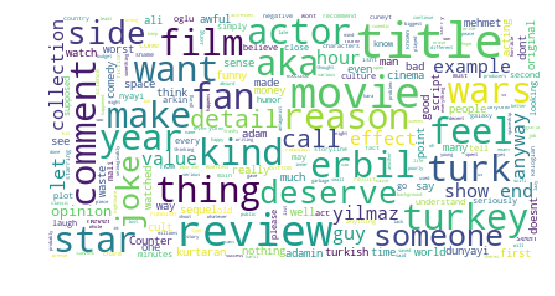

In [88]:
plt.imshow(wc23)
plt.axis("off")
plt.show()

Title: Pledge This Voting and Rating

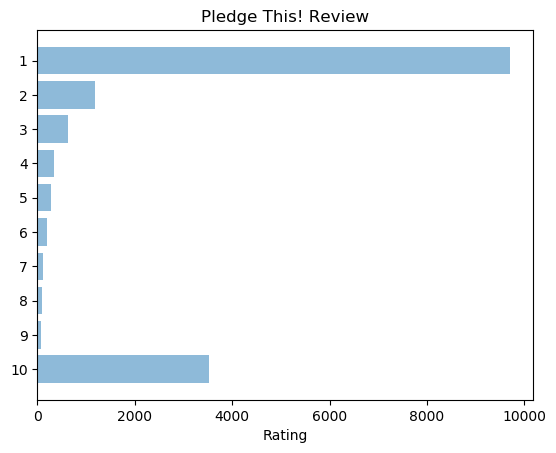

In [89]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (3528, 76, 95, 111, 191, 271, 351, 636, 1182, 9698)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Pledge This! Review")
 
plt.show()

In [90]:
# Number of Votes of Pledge This
sum(votes)

16139

In [91]:
#The Pledge This Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0417056/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  No Rating lower than a one


Review: I have often used the phrase the worst movie I have ever seen when describing a movie that I did not enjoy. That was until I saw Pledge This. ever since then I have been unable to say worst movie ever because I know that it wasn't as bad as this one. Ill admit I thought I knew what I was getting into when I saw this movie. I knew that it was National Lampoon and how that name no longer means what it did in the 70s and 80s. I knew that it was staring Paris Hilton so that I shouldn't really expect anything majestic. But I thought that it would be a more or less fun 90 minutes if i wanted to watch a simple brainless sex comedy with lots of fart jokes. Boy was I wrong. There is nothing good about this movie. Not the story obviously or the acting. But I was almost stunned to see how bad the rest of the movie was. It was poorly edited, the quality was awful. One whole scene took place in a white room and the walls were so bright that I couldn't ev

In [95]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Pledge This.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 68
paris : 40
film : 37
even : 33
review: : 26
title: : 25
bad : 24
hilton : 22
one : 21
 : 16
worst : 15
dont : 15
hot : 15
think : 14
didnt : 14
watch : 13
acting : 13
time : 13
see : 12
every : 12
funny : 12
watched : 12
actually : 11
make : 11
national : 10
nothing : 10
good : 10
movies : 10
terrible : 10
better : 10
name : 9
sorority : 9
seen : 8
made : 8
plot : 8
much : 8
saw : 7
wasnt : 7
thought : 7
scene : 7
now : 7
im : 7
way : 7
absolutely : 7
thats : 7
1 : 7
pledge : 6
know : 6
anything : 6
minutes : 6
person : 6
put : 6
part : 6
find : 6
thing : 6
isnt : 6
3 : 6
girl : 6
girls : 6
lot : 6
enough : 6
films : 6
script : 6
doesnt : 6
fact : 6
lampoons : 6
must : 6
everyone : 6
want : 6
knew : 5
lampoon : 5
really : 5
jokes : 5
characters : 5
still : 5
end : 5
entire : 5
worse : 5
low : 5
give : 5
something : 5
never : 5
gave : 5
watching : 5
probably : 5
either : 5
people : 5
brain : 5
someone : 5
shes : 5
character : 5
back : 5
used : 4
say : 4
story : 4
reason : 4
c

ripoff : 1
failed : 1
achieve : 1
effect : 1
gag : 1
previous : 1
reaction : 1
chicks : 1
plastic : 1
table : 1
shocked : 1
garbage : 1
returned : 1
store : 1
opened : 1
told : 1
money : 1
possession : 1
anymore : 1
favor : 1
mindshattering : 1
sophistication : 1
belief : 1
philosophical : 1
requires : 1
understanding : 1
platos : 1
republic : 1
combined : 1
arthur : 1
schopenhauers : 1
thesis : 1
condition : 1
master : 1
hidden : 1
gem : 1
rear : 1
classics : 1
8th : 1
true : 1
meaning : 1
tonne : 1
coconut : 1
repeadtly : 1
relatives : 1
discuss : 1
reflect : 1
family : 1
relationships : 1
afterwards : 1
wow : 1
president : 1
whatever : 1
hottest : 1
contest : 1
held : 1
popular : 1
magazinei : 1
purely : 1
everything : 1
gross : 1
augmentation : 1
simply : 1
downright : 1
insulting : 1
distasteful : 1
whats : 1
keeps : 1
portraying : 1
goddess : 1
worships : 1
minor : 1
says : 1
god : 1
minute : 1
uses : 1
opportunity : 1
degrade : 1
humiliate : 1
show : 1
superior : 1
english : 1
q

In [96]:
wc24 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [97]:
wc24.generate(wordcloud)

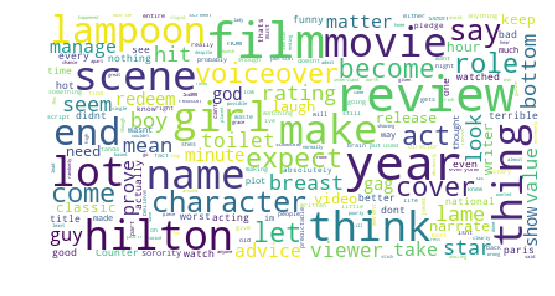

In [98]:
plt.imshow(wc24)
plt.axis("off")
plt.show()

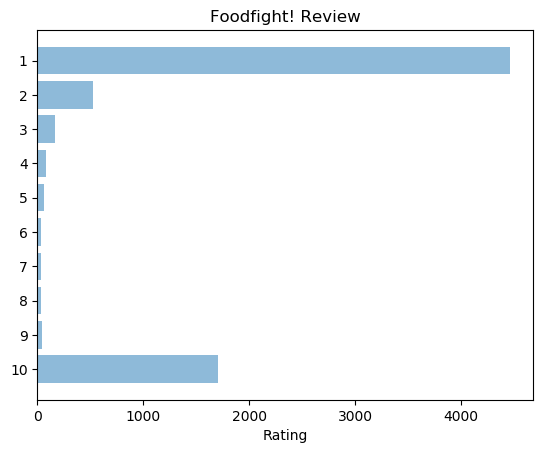

In [92]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (1702, 43, 33, 33, 32, 64, 81, 165, 529, 4462)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Foodfight! Review")
 
plt.show()

In [93]:
# Number of Votes of Foodfight!
sum(votes)

7144

In [94]:
#The Foodfight! Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0249516/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  its so damn bad


Review: This movie is so bad, it looks like something that some kid made on a 3d modeling program in his spare time and was super excited to show to parents.The only thing i liked is that it spawned 2 great review videos on YouTube.Seriously, if you spent so much money making it, you should at least finalize the qualityI think these people should look at what some people have managed to make on blender, a free modeling program. it does not taker a master mind crew to make a movie that is even slightly watchable


Title:  Wait, what?


Review: You know, this review isn't based on the premise that this is an egregious film. It is, I agree that this film is abhorrent. However, the legend surrounding this lukewarm, atrocious piece of media is far more enjoyable than this pile of excrement. This *ahem* "film" came out December of 2012. It was supposed to come out in December of 2002. The film was stolen, and that was probably for the best. However, because the dire

In [99]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Foodfight.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 97
film : 60
bad : 41
even : 41
animation : 33
characters : 32
make : 29
one : 28
title: : 24
review: : 24
watch : 24
story : 21
look : 20
animated : 20
x : 19
think : 18
worst : 17
films : 16
really : 16
time : 15
terrible : 15
food : 15
seen : 15
movies : 15
made : 14
thing : 14
charlie : 14
character : 14
will : 14
dont : 14
ugly : 14
something : 13
people : 13
many : 13
good : 13
awful : 12
 : 12
brand : 11
dex : 11
lady : 11
kids : 11
horrible : 11
makes : 11
came : 10
every : 10
fact : 10
foodfight : 10
see : 10
much : 9
least : 9
know : 9
sheen : 9
almost : 9
life : 9
years : 9
cgi : 9
love : 9
ive : 9
sense : 9
jokes : 9
supermarket : 8
give : 8
well : 8
world : 8
im : 8
nothing : 8
watching : 8
didnt : 8
way : 8
doesnt : 8
looks : 7
review : 7
best : 7
million : 7
id : 7
budget : 7
oh : 7
crap : 7
plot : 7
mascots : 7
toy : 7
kasanoff : 7
release : 7
start : 7
dogtective : 7
store : 7
theres : 7
writing : 7
sexual : 7
worse : 7
go : 7
try : 7
work : 7
minutes : 7
say :

outfits : 1
stripper : 1
schoolgirl : 1
fetish : 1
shrieks : 1
minions : 1
gathered : 1
rally : 1
vile : 1
comedy : 1
nazism : 1
olds : 1
hope : 1
probono : 1
itgenuinely : 1
avoid : 1
costs : 1
patronizing : 1
lifeless : 1
disrespectful : 1
offensivetoanyonewithabrain : 1
unmitigated : 1
thatbecause : 1
message : 1
amounts : 1
moviefoodfight : 1
pure : 1
evilso : 1
$73000 : 1
shocking : 1
justice : 1
worldten : 1
entertainments : 1
writerdirectorproducer : 1
act : 1
industrial : 1
espionage : 1
salute : 1
brave : 1
actively : 1
hindered : 1
fought : 1
cells : 1
everywhere : 1
fifteen : 1
stupiderdont : 1
skip : 1
burn : 1
bury : 1
desolate : 1
field : 1
deserves : 1
die : 1
worthless : 1
drop : 1
piddle : 1
isalso : 1
*¢% : 1
larry : 1
crossover : 1
compared : 1
similar : 1
awesome : 1
lego : 1
fictional : 1
sadly : 1
wouldnt : 1
quite : 1
honor : 1
eight : 1
fourteen : 1
joshua : 1
promised : 1
land : 1
less : 1
emotions : 1
staring : 1
blankly : 1
ones : 1
labeled : 1
celebrity : 1


kept : 1
changing : 1
filmmakers : 1
default : 1
loans : 1
rights : 1
fraction : 1
dvd : 1
recentlyso : 1
reasons : 1
countless : 1
concentrate : 1
major : 1
problem : 1
cheapest : 1
lousiest : 1
productits : 1
although : 1
graphically : 1
1990swell : 1
blocky : 1
haphazardly : 1
garish : 1
speaks : 1
manner : 1
backgroundswhich : 1
usually : 1
fuzzy : 1
oldschool : 1
mystthe : 1
second : 1
spiked : 1
appropriate : 1
choice : 1
pieces : 1
brilliant : 1
include: : 1
muffins : 1
easy : 1
potato : 1
juice : 1
become : 1
chipfaced : 1
candyarse : 1
scrub : 1
bubbles : 1
fudge : 1
comment : 1
sum : 1
strongly : 1
object : 1
childrenwith : 1
consisting : 1
knockoff : 1
mcgruff : 1
crime : 1
involving : 1
livebut : 1
assaulted : 1
senses : 1
insanely : 1
plotdespite : 1
plethora : 1
b : 1
clist : 1
provide : 1
average : 1
person : 1
fans : 1
dreck : 1
perhaps : 1
seeingif : 1
professors : 1
schools : 1
ringling : 1
art : 1
design : 1
produced : 1
steer : 1
clear : 1
wretched : 1
bile : 1


In [100]:
wc25 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [101]:
wc25.generate(wordcloud)

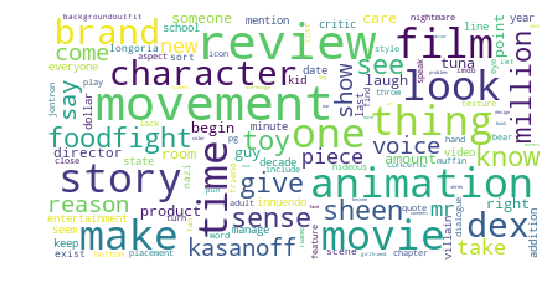

In [102]:
plt.imshow(wc25)
plt.axis("off")
plt.show()

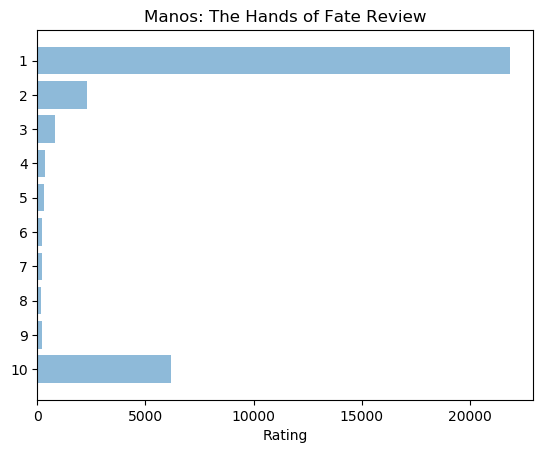

In [103]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (6165, 218, 186, 204, 217, 328, 363, 815, 2309, 21849)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Manos: The Hands of Fate Review")
 
plt.show()

In [104]:
# Number votes of Manos: The Hands of Fate
sum(votes)

32654

In [105]:
#The Manos: The Hands of Fate Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0060666/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Your eyes and ears will BLEED!


Review: Some films are so bad, they're good. Meaning "fun" or "entertaining" or at least "interesting"... But few films can claim to be so dreadful, you actually feel physical pain while viewing them. So bad are these damned few that you don't experience them or watch them: you "endure" them. This is the mother of all such films!"Manos the hands of fate" is without a doubt the most inept and atrociously awful film ever made. Its poorness is so extreme that of itself it is the film's strongest selling point. The script is non-existent, the acting makes Steven Seagal look like a member of the Royal Shakespeare Company and the editing could have been less horrendously botched by a blind Eskimo with no arms. It is also painfully slow. this film makes might barely last 70 minutes but you will feel like you've aged ten years by the end of it. That's what makes a film truly bad: the fact that despite its overbearing weaknesses it isn't even entertainin

In [106]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("The Manos_The Hands of Fate.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 93
film : 69
manos : 48
one : 40
bad : 39
worst : 36
 : 31
torgo : 30
title: : 25
will : 25
review: : 25
even : 25
hands : 24
movies : 23
fate : 21
horror : 18
films : 17
see : 17
time : 17
people : 16
manos: : 16
good : 15
acting : 15
master : 15
made : 14
makes : 14
make : 14
much : 14
editing : 13
minutes : 13
isnt : 13
seen : 13
many : 13
quite : 13
least : 12
watch : 11
every : 11
family : 11
world : 11
hal : 11
way : 11
feel : 10
awful : 10
look : 10
end : 10
work : 10
never : 10
done : 10
know : 10
version : 10
really : 10
plot : 10
say : 10
little : 10
without : 9
truly : 9
enough : 9
music : 9
upon : 9
times : 9
camera : 9
worse : 9
long : 9
yet : 9
dont : 8
think : 8
lost : 8
go : 8
poorly : 8
actors : 8
el : 8
number : 8
picture : 8
script : 7
watching : 7
direction : 7
though : 7
god : 7
wives : 7
cant : 7
warren : 7
scenes : 7
give : 7
paso : 7
far : 7
absolutely : 7
thought : 7
masters : 7
actually : 6
years : 6
cinematic : 6
part : 6
person : 6
sound : 6
youll : 

scorses : 1
francis : 1
ford : 1
stephen : 1
king : 1
14 : 1
legendary : 1
brilliantnotthere : 1
beating : 1
ground : 1
third : 1
fourth : 1
grown : 1
fungusmanos : 1
yankees : 1
southwestern : 1
nobody : 1
overseen : 1
humangoat : 1
hybrid : 1
owned : 1
enigmatic : 1
worshipper : 1
collects : 1
trapping : 1
figure : 1
pretty : 1
easily : 1
ends : 1
virtually : 1
sequences : 1
artsy : 1
jazz : 1
vehicle : 1
acoustic : 1
groovy : 1
soundtrack : 1
dialogthe : 1
biggest : 1
values : 1
chase : 1
nonethere : 1
whats : 1
right : 1
jerks : 1
irks : 1
dramamine : 1
recommended : 1
recent : 1
catastrophes : 1
maelstrom : 1
maleficence : 1
emanating : 1
chairthe : 1
object : 1
class : 1
tedious : 1
unwatchable : 1
pans : 1
opening : 1
scenessome : 1
explain : 1
aggravating : 1
expand : 1
boundaries : 1
contemporary : 1
cinemagoers : 1
imaginations : 1
commercial : 1
sex : 1
comedies : 1
occupies : 1
important : 1
participants : 1
cost : 1
lasting : 1
american : 1
pie : 1
reasons : 1
harmful : 1


stuttering : 1
voice : 1
floppy : 1
hat : 1
eroticism : 1
manservant : 1
statuswhen : 1
insert : 1
squeal : 1
delight : 1
wept : 1
yummy : 1
brushing : 1
furry : 1
goatlike : 1
legs : 1
polishing : 1
hooves : 1
trimming : 1
beard : 1
fleadipping : 1
godly : 1
goat : 1
led : 1
lamb : 1
slaughter : 1
:curse : 1
hnds : 1
robbing : 1
fantasywhy : 1
care : 1
away : 1
burned : 1
step1 : 1
somehow : 1
parts : 1
movie2directing : 1
filler : 1
actionless : 1
situations : 1
movie3editing : 1
wow : 1
thereof : 1
next : 1
bother : 1
clips : 1
smooth : 1
purposely : 1
repeating : 1
forgot : 1
line4acting : 1
forced : 1
phony : 1
repetition : 1
delayed : 1
reactions : 1
drunk : 1
motions : 1
swear : 1
retardedwhen : 1
weird : 1
cape : 1
black : 1
appreciate : 1
justbreathtaking : 1
existence : 1
via : 1
commentary : 1
uplifted : 1
fantastically : 1
lackey : 1
latters : 1
um : 1
quarrel : 1
redefines : 1
choreography : 1
practice : 1
transitions : 1
sceneser : 1
exist : 1
scarcely : 1
devote : 1
pov 

In [107]:
wc26 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [108]:
wc26.generate(wordcloud)

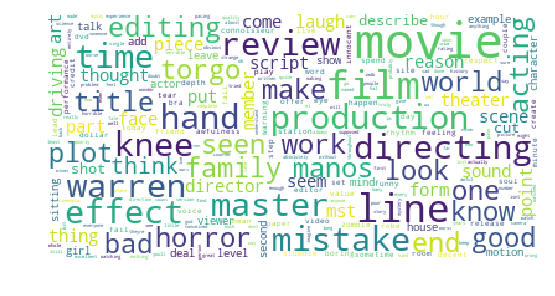

In [111]:
plt.imshow(wc26)
plt.axis("off")
plt.show()

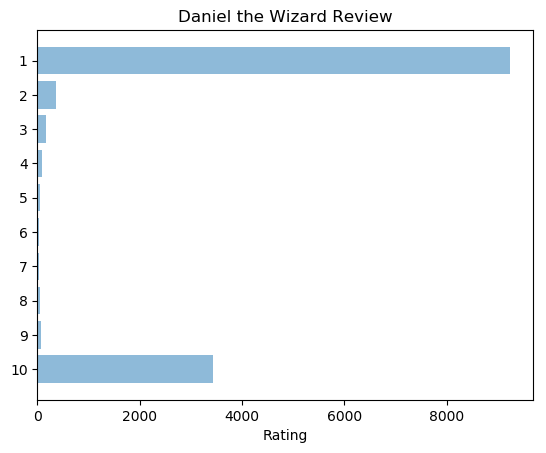

In [112]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (3428, 75, 47, 36, 42, 59, 87, 169, 356, 9235)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Daniel the Wizard Review")
 
plt.show()

In [113]:
# Number votes of Daniel the Wizard
sum(votes)

13534

In [114]:
#The Daniel the wizard Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0421051/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  Worst movie i've ever seen


Review: A week ago i watched Daniel der Zauberer. I wanted to give it a chance after all the bad reviews it had received. This foolish idea ended up being just a waste of my precious time.THe plot reads as follows: A boy who became famous through a TV show has problems with people who don't like his music. The main character is played by daniel kueblboeck, the new star from Germans pop idol (so Kueblboeck actually plays himself). After all I'm proud i made it through the movie. To be honest i only watched it till the end to write about it. The movie itself is so bad it almost hurts physically. So this is a warning : DO NOT WATCH THIS MOVIE!! DO NOT GIVE IT A CHANCE!( unless you are either a masochist or a küblböck fan). Don't say i didn't want you. This movie should receive a 0 Voting instead of an awful.


Title:  German singer Daniel Küblböck plays himself in a dramatic bad art-movie


Review: This is probably the worst movie ever.Daniel Küblböck 

In [115]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Daniel The Wizard.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 102
daniel : 50
 : 33
watch : 30
title: : 25
review: : 25
bad : 25
dont : 25
worst : 22
even : 22
film : 20
küblböck : 19
german : 17
one : 17
really : 16
well : 16
der : 14
zauberer : 14
want : 14
good : 14
will : 14
watching : 14
know : 12
give : 11
acting : 11
people : 10
kill : 10
something : 10
seen : 9
movies : 9
story : 9
first : 9
life : 9
ive : 8
music : 8
made : 8
say : 8
never : 8
actors : 8
many : 8
might : 8
better : 8
trash : 8
actually : 7
awful : 7
kind : 7
whole : 7
time : 7
around : 7
watched : 6
idea : 6
plot : 6
pop : 6
didnt : 6
probably : 6
fact : 6
actor : 6
real : 6
reason : 6
person : 6
bit : 6
nothing : 6
enough : 6
family : 6
way : 6
now : 6
several : 6
far : 6
part : 6
without : 6
make : 6
minutes : 6
guess : 6
fun : 6
waste : 5
show : 5
instead : 5
isnt : 5
lommel : 5
1 : 5
money : 5
makes : 5
go : 5
still : 5
point : 5
art : 5
used : 5
see : 5
trying : 5
daniels : 5
going : 5
least : 5
wizard : 5
annoying : 5
youre : 5
main : 4
star : 4
idol : 4
im

home : 1
backstage : 1
concerts : 1
muttering : 1
intentions : 1
croons : 1
cat : 1
shady : 1
nogoodnik : 1
bares : 1
distracting : 1
resemblance : 1
peter : 1
stormare : 1
haired : 1
brooding : 1
leather : 1
laughing : 1
loud : 1
sorts : 1
significance : 1
product : 1
diseased : 1
mind : 1
incomprehensible : 1
methere : 1
pick : 1
night : 1
ben : 1
arthur : 1
five : 1
american : 1
dollars : 1
recently : 1
20 : 1
lameness : 1
ghost : 1
considering : 1
torturing : 1
antagonist : 1
stereotypical : 1
hippy : 1
cr*p : 1
sprouted : 1
1960s : 1
whiny : 1
attitude : 1
hippies : 1
hated : 1
succeeded : 1
twist : 1
seconds : 1
sh*t : 1
soap : 1
opera : 1
kitsch : 1
schmaltz : 1
endure : 1
weekdays : 1
women : 1
40s : 1
orand : 1
teen : 1
escape : 1
reality : 1
infest : 1
happyhappy : 1
thoughts : 1
manner : 1
*sigh* : 1
admiring : 1
dignity : 1
gays : 1
bisexuals : 1
p*ssy : 1
semiintelligent : 1
mindset : 1
3yo : 1
book : 1
mainstream : 1
feeds : 1
books : 1
innovative : 1
stories : 1
autobiog

In [116]:
wc27 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [117]:
wc27.generate(wordcloud)

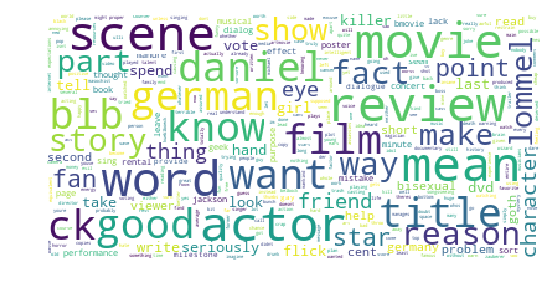

In [118]:
plt.imshow(wc27)
plt.axis("off")
plt.show()

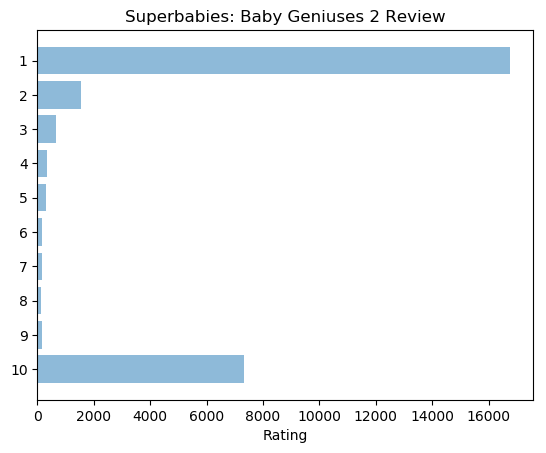

In [119]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (7332, 152, 135, 171, 171, 300, 355, 663,1535, 16749)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Superbabies: Baby Geniuses 2 Review")
 
plt.show()

In [120]:
# Number votes of Superbabies: Baby Geniuses 2
sum(votes)

27563

In [121]:
# The Superbabies: Baby Geniuses 2 Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0270846/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  A Great Movie From Sony Pictures. It is unjust to be under-rated!.


Review: Superbabies:Baby Geniuses 2 is a perfect movie for kids. It has all the elements of success: entertainment,great acting, amazing direction and a good story. It is unfair to see some unjust critics harshly criticizing entertaining and good children movies because they are not paid from movie makers .Four genius babies play detectives and cleverly fighting evil.Media mogul Bill Biscane kidnaps innocent children everywhere and there is a cute and smart child called Kahuna who after drinking a special chemical he becomes a strong kid just like a superman, he changes into a super-baby to fight evil and rescue the lives of his friends.I have absolutely enjoyed watching this stunning movie.Alas it is too good to be under-rated!.


Title:  Best movie I have ever watched


Review: This movie is the best movie I have ever watched. Even masterpieces like E.T, Jaws and even Avatar can't beat this movie.The acting 

In [124]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("The Superbabies_Baby Geniuses 2.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 61
film : 33
babies : 28
baby : 24
title: : 21
review: : 21
geniuses : 20
best : 16
kahuna : 14
great : 13
2 : 13
one : 13
watch : 13
good : 10
children : 10
movies : 10
biscane : 10
even : 10
really : 10
acting : 9
superbabies: : 9
bob : 9
seen : 9
see : 8
plot : 8
people : 8
watching : 7
world : 7
work : 7
little : 7
dont : 7
masterpiece : 7
made : 7
clark : 6
super : 6
 : 6
must : 6
time : 6
potty : 6
underrated : 5
kids : 5
story : 5
four : 5
special : 5
first : 5
brother : 5
day : 5
will : 5
talk : 5
know : 5
many : 5
jon : 5
buy : 5
funny : 5
life : 5
loved : 5
every : 5
effects : 5
amazing : 4
unfair : 4
mogul : 4
bill : 4
everywhere : 4
smart : 4
superbaby : 4
absolutely : 4
enjoyed : 4
watched : 4
top : 4
boy : 4
actually : 4
biscanes : 4
bobbins : 4
still : 4
kane : 4
much : 4
despite : 4
never : 4
make : 4
director : 4
ive : 4
wasnt : 4
something : 4
scenes : 4
everything : 4
look : 4
american : 4
unjust : 3
genius : 3
kidnaps : 3
cute : 3
drinking : 3
chemical : 3
b

aspect : 1
seemed : 1
truly : 1
offered : 1
bobs : 1
opinion : 1
black : 1
occasionally : 1
unevenalthough : 1
uneven : 1
career : 1
immensely : 1
darn : 1
fine : 1
match : 1
able : 1
capture : 1
essentials : 1
required : 1
childhood : 1
ages : 1
forget : 1
dmr : 1
theater : 1
prideof : 1
pride : 1
mentioning : 1
ticketer : 1
puking : 1
walking : 1
street : 1
breaks : 1
mishaps : 1
explosions : 1
diaper : 1
poop : 1
boys : 1
unload : 1
ton : 1
crap : 1
motion : 1
picture : 1
today : 1
lack : 1
enough : 1
poo : 1
pee : 1
contraptions : 1
sunglasses : 1
wearing : 1
badass : 1
voights : 1
downright : 1
spellbinding : 1
industry : 1
call : 1
pizazz : 1
personal : 1
highlight : 1
originally : 1
fought : 1
latter : 1
shone : 1
produced : 1
oscaremmy : 1
somehow : 1
midget : 1
stuntman : 1
throughout : 1
classy : 1
well : 1
touch : 1
mentioned : 1
appreciated : 1
professional : 1
three : 1
stooges : 1
pretty : 1
blown : 1
away : 1
obscure : 1
superheroes : 1
andor : 1
iron : 1
follows: : 1
gl

In [125]:
wc28 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [126]:
wc28.generate(wordcloud)

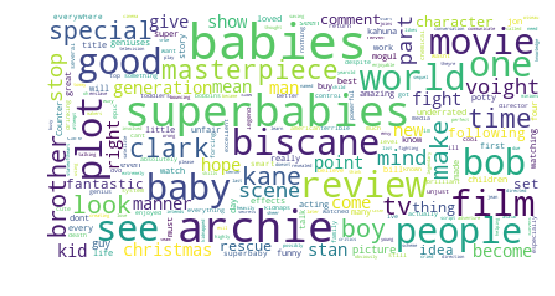

In [127]:
plt.imshow(wc28)
plt.axis("off")
plt.show()

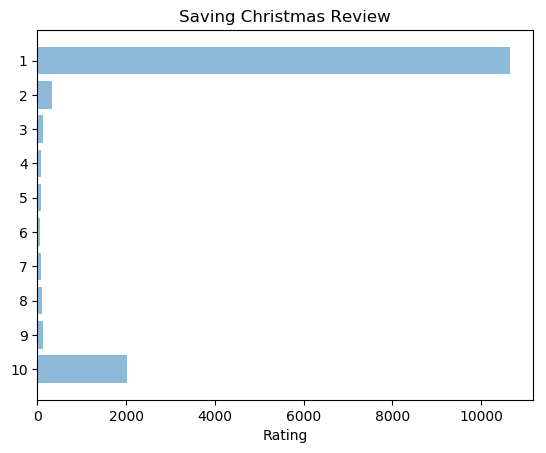

In [128]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (2012, 129, 101, 89, 56, 74, 75, 128, 325, 10641)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Saving Christmas Review")
 
plt.show()

In [129]:
# Number votes of Saving Christmas
sum(votes)

13630

In [130]:
# The Saving Christmas Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt4009460/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  An interminable, shoddily-researched lecture masquerading as comedy


Review: For those of us who have watched Kirk Cameron pontificate on the wonders of the banana, or read his musings on the legitimacy of the existence of fire-breathing dragons, we know that Kirk Cameron himself is comedy gold. One might expect more hilarity from Cameron in Saving Christmas, but Cameron actually intentionally tries to build a comedy here, and the result is an unfunny, unfocused, interminable mess.The film begins with an uncomfortable scene involving Kirk Cameron sitting in a chair, lecturing at the audience. "They don't want us to love Christmas," Cameron declares authoritatively, never bothering to define exactly who "they" are. Cameron drones on for several more minutes, and at this point in the film, I heard a kid in the back of the theater yawn loudly—perhaps an audible protest that this film would not be the exciting romp promised on the poster.Finally, the film cuts away from Kirk Camer

In [131]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Saving Christmas.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 80
christmas : 62
cameron : 59
kirk : 51
film : 44
christian : 34
see : 32
title: : 25
review: : 25
camerons : 21
one : 20
even : 20
never : 19
time : 19
bad : 19
way : 17
make : 17
christians : 16
worst : 16
will : 16
know : 15
dont : 15
watch : 15
us : 14
nicholas : 14
movies : 13
back : 12
thats : 12
jesus : 12
im : 12
tree : 12
materialism : 11
god : 11
think : 11
give : 11
acting : 11
good : 11
want : 10
minutes : 10
fact : 10
bible : 10
made : 10
holiday : 10
things : 10
people : 10
much : 10
car : 9
really : 9
saving : 8
actually : 8
christianity : 8
makes : 8
say : 8
many : 8
history : 8
believe : 8
hes : 8
everyone : 8
thought : 8
comedy : 7
audience : 7
point : 7
gifts : 7
every : 7
youre : 7
plot : 7
sure : 7
money : 7
anyone : 7
says : 7
theater : 6
away : 6
story : 6
feel : 6
dance : 6
st : 6
awful : 6
life : 6
pagan : 6
everything : 6
watching : 6
making : 6
saint : 6
didnt : 6
seriously : 6
 : 6
buy : 6
trying : 6
claims : 6
lecture : 5
love : 5
several : 5
party

demographic : 1
ignored : 1
former : 1
television : 1
devout : 1
outspoken : 1
thrown : 1
hat : 1
ring : 1
latching : 1
newfound : 1
trend : 1
disjointed : 1
structurally : 1
bankrupt : 1
interwoven : 1
coherency : 1
dialog : 1
written : 1
wooden : 1
teach : 1
artificial : 1
living : 1
lights : 1
flair : 1
macys : 1
thanksgiving : 1
passes : 1
hand : 1
segregate : 1
spread : 1
cheer : 1
private : 1
homes : 1
celebrate : 1
rambles : 1
sets : 1
theme : 1
film; : 1
circumventing : 1
results : 1
thoughtfullyarticulated : 1
pointwe : 1
cut : 1
held : 1
hired : 1
erected : 1
feast : 1
prepared : 1
incorruptibly : 1
cheery : 1
mood; : 1
except : 1
doane : 1
moping : 1
around : 1
quietly : 1
slipping : 1
learns : 1
bothers : 1
immensely : 1
watches : 1
toys : 1
play : 1
materials : 1
illuminating : 1
center : 1
neglecting : 1
ultimate : 1
seasoncameron : 1
initiate : 1
lesson : 1
told : 1
enormously : 1
biased : 1
lens : 1
dodgy : 1
muddled : 1
manner : 1
absorbed : 1
significance : 1
meanspir

poorly : 1
analogy : 1
includedim : 1
missing : 1
bits : 1
inclined : 1
unsettling : 1
stand : 1
ok : 1
direct : 1
quote : 1
passages : 1
tells : 1
worldly : 1
exhorts : 1
viewers : 1
eat : 1
bursting : 1
ham : 1
butterbut : 1
gluttony : 1
deadly : 1
sinat : 1
feeding : 1
hungry : 1
charity : 1
volunteering : 1
self : 1
immediate : 1
remember : 1
command : 1
followers : 1
socameron : 1
gives : 1
ago : 1
fitting : 1
wants : 1
lead : 1
doublecheck : 1
remembering : 1
correctly : 1
disagrees : 1
considers : 1
turned : 1
declare : 1
blasphemous : 1
prophet : 1
fall : 1
victim : 1
pride : 1
overdrive : 1
testament : 1
expression : 1
poop : 1
cia : 1
torture : 1
terrorists : 1
secrets : 1
force : 1
againkirk : 1
proved : 1
nut : 1
inconsistencies : 1
uses : 1
lack : 1
intelligence : 1
master : 1
find : 1
endedworst : 1
eh : 1
definitely : 1
deserves : 1
scientific : 1
inaccuracies : 1
list : 1
plea : 1
fans : 1
online : 1
anticipated : 1
camd : 1
wouldnt : 1
pay : 1
cam : 1
upload : 1
online

In [132]:
wc29 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [133]:
wc29.generate(wordcloud)

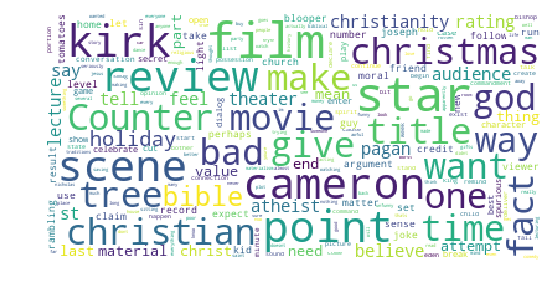

In [134]:
plt.imshow(wc29)
plt.axis("off")
plt.show()

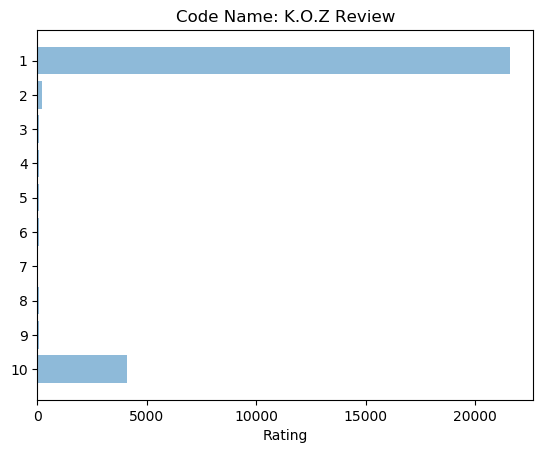

In [135]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (4084, 96, 59, 51, 55, 72, 58, 88, 201, 21586)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Code Name: K.O.Z Review")
 
plt.show()

In [136]:
# Number votes of Code Name: K.O.Z
sum(votes)

26350

In [ ]:
Title: Code Name: K.O.Z Review

In [137]:
# The Code Name: K.O.Z Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt4458206/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title:  If you want to make propaganda, at least make it good


Review: A really horrible film which only aims to increase support for the idiotic things the government did and will do. It implies that almost every bad event happened in the past 10-15 years is because of a terrorist organization which works together with CIA, Mossad etc. It is so idiotic that it shows the gezi protests like something that was controlled behind a screen by the same organization (which clearly doesn't exist) What can I say, if you are stupid enough to believe these things (unfortunately many people are) you may like the film but that doesn't change the fact that it's a poorly written and pathetically directed propaganda and a decent director could do something better while he's in the toilet.


Title:  This so-called movie is a propaganda !


Review: Shame on the directors, the purpose of this so-called movie is clearly politically motivated. The intention smells very bad a political propaganda reminding

In [138]:
from os import path
from PIL import Image
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

file = open("Code Name_KOZ.txt", encoding = 'unicode_escape' )
stopwords = set(line.strip() for line in open('stopwords'))
wordcloud = {}

for word in file.read().split():
    word = word.lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    word = word.replace("-","")
    word = word.replace(">","")
    word = word.replace("/","")
    word = word.replace("+","")
    word = word.replace("'","")
    word = word.replace("(","")
    word = word.replace(")","")
    word = word.replace("!","")
    word = word.replace("?","")
    word = word.replace("","")
    word = word.replace("&","and")
    if word not in stopwords:
        if word not in wordcloud:
            wordcloud[word] = 1
        else:
            wordcloud[word] += 1

d = collections.Counter(wordcloud)
for word, count in d.most_common():
    print(word , ":", count)

wordcloud = re.sub("[^a-zA-Z]"," ",str(d))

movie : 96
film : 30
title: : 25
review: : 25
propaganda : 23
turkish : 21
turkey : 21
government : 20
will : 20
erdogan : 20
watch : 20
free : 20
people : 18
even : 18
 : 16
worst : 14
time : 13
waste : 12
money : 12
go : 11
one : 11
really : 10
bad : 10
political : 10
awful : 10
lies : 10
akp : 10
make : 9
dont : 9
give : 9
hours : 9
star : 9
corruption : 8
country : 8
dictator : 8
story : 8
want : 7
believe : 7
many : 7
watching : 7
president : 7
see : 7
terrible : 7
never : 7
party : 7
actors : 7
media : 7
regime : 7
support : 6
fact : 6
socalled : 6
mean : 6
please : 6
acting : 6
trying : 6
koz : 6
gülen : 6
plot : 6
good : 5
horrible : 5
stupid : 5
instead : 5
produced : 5
back : 5
watched : 5
seen : 5
reason : 5
lot : 5
world : 5
way : 5
family : 5
years : 4
doesnt : 4
better : 4
cinema : 4
scandals : 4
december : 4
cover : 4
know : 4
now : 4
employees : 4
spend : 4
take : 4
suffer : 4
pay : 4
put : 4
nothing : 4
still : 4
thing : 4
boring : 4
tickets : 4
order : 4
sense : 4
int

consist : 1
falsified : 1
news : 1
prevent : 1
quality : 1
players : 1
nobody : 1
showed : 1
places : 1
everybody : 1
falsifying : 1
result : 1
worth : 1
professional : 1
filmmaker : 1
youve : 1
pretty : 1
love : 1
guaranteed : 1
ride : 1
grate : 1
matter : 1
inane : 1
top : 1
wondering : 1
whoever : 1
cash : 1
bag : 1
actorsactresses : 1
hadnt : 1
starred : 1
deny : 1
conclusion: : 1
going : 1
fat : 1
slags : 1
stay : 1
let : 1
explain : 1
brieflyin : 1
numerous : 1
bilal : 1
clever : 1
sumeyye : 1
important : 1
governors : 1
ruler : 1
involved : 1
serious : 1
consequently : 1
positive : 1
perceptions : 1
teared : 1
proakp : 1
creating : 1
imaginary : 1
enemy: : 1
parallels : 1
pro : 1
facts : 1
opinion : 1
trap : 1
performed : 1
parallelsabout : 1
movie; : 1
regardless : 1
music : 1
realities : 1
lets : 1
exactly : 1
remember : 1
ended : 1
crappy : 1
dumb : 1
half : 1
wits : 1
herpes : 1
exchange : 1
totally : 1
wiped : 1
memory : 1
describe : 1
oh : 1
thought : 1
previews : 1
theate

In [139]:
wc30 = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

In [140]:
wc30.generate(wordcloud)

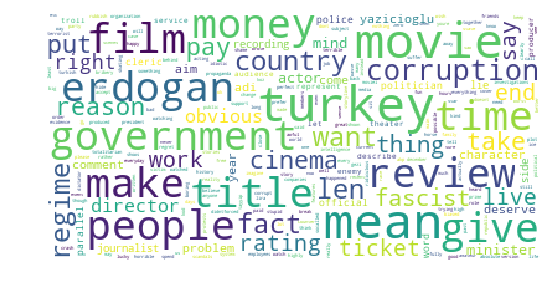

In [141]:
plt.imshow(wc30)
plt.axis("off")
plt.show()